In [3]:
#Execute this cell if have problem with relative import
#.
import sys; sys.path.insert(0, '..')

In [4]:
from pprint import pprint

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
pit_df = pd.read_csv("../Data/Corpus_csv/pitchers_all_career.csv")

In [6]:
pit_df.head()

,Id,Name,Active,First year,Last year,Url,Country,Bat hand,Throw hand,Full Name,HoF,HoF type,HoF year,HoF comittee,Player type,retirement_age,total_seasons,career_teams,career_leagues,first_position,second_position,play_in_mayors,play_in_negro_league,two_way_player,debut_decade,retirament_decade,W_pt,L_pt,W-L%_pt,ERA_pt,G_pt,GS_pt,GF_pt,CG_pt,SHO_pt,SV_pt,IP_pt,H_pt,R_pt,ER_pt,HR_pt,BB_pt,IBB_pt,SO_pt,HBP_pt,BK_pt,WP_pt,BF_pt,ERA+_pt,FIP_pt,WHIP_pt,H9_pt,HR9_pt,BB9_pt,SO9_pt,SO/W_pt,RAA_pt,WAA_pt,WAR_pt,RAR_pt
0,Jay_Aldrich_192,Jay Aldrich,False,1987,1990,https://www.baseball-reference.com//players/a/...,us,Right,Right,Jay Robert Aldrich,0,-,-,-,1,29,3,"['MIL', 'BAL']","['AL', 'NL']",P,-,1,0,0,1980,1990,6.0,5.0,0.545,4.72,62.0,0.0,21.0,0.0,0.0,2.0,108.2,119.0,62.0,57.0,12.0,39.0,9.0,46.0,3.0,2.0,3.0,474.0,90.0,4.57,1.454,9.9,1.0,3.2,3.8,1.18,-7.0,-0.7,-0.1,4.0
1,A.J._Achter_52,A.J. Achter,False,2014,2016,https://www.baseball-reference.com//players/a/...,us,Right,Right,Adam Joseph Achter,0,-,-,-,1,27,3,"['MIN', 'LAA']",['AL'],P,-,1,0,0,2010,2010,2.0,1.0,0.667,3.92,45.0,0.0,22.0,0.0,0.0,0.0,62.0,69.0,30.0,27.0,13.0,21.0,2.0,33.0,1.0,0.0,0.0,267.0,104.0,5.87,1.452,10.0,1.9,3.0,4.8,1.57,-2.0,-0.3,0.3,4.0
2,A.J._Alexy_214,A.J. Alexy,True,2021,2021,https://www.baseball-reference.com//players/a/...,us,Right,Right,Adam John Alexy,0,-,-,-,1,23,1,['TEX'],['AL'],P,-,1,0,0,2020,2020,3.0,1.0,0.750,4.70,5.0,4.0,0.0,0.0,0.0,0.0,23.0,13.0,12.0,12.0,4.0,17.0,0.0,17.0,1.0,0.0,0.0,97.0,95.0,6.30,1.304,5.1,1.6,6.7,6.7,1.00,-1.0,-0.1,0.1,1.0
3,Aaron_Ashby_601,Aaron Ashby,True,2021,2022,https://www.baseball-reference.com//players/a/...,us,Right,Left,Aaron Phillip Ashby,0,-,-,-,1,24,2,['MIL'],['NL'],P,-,1,0,0,2020,2020,3.0,5.0,0.375,3.70,23.0,8.0,5.0,0.0,0.0,2.0,65.2,51.0,35.0,27.0,6.0,32.0,0.0,78.0,2.0,0.0,3.0,281.0,113.0,3.52,1.264,7.0,0.8,4.4,10.7,2.44,-6.0,-0.6,-0.1,1.0
4,Abe_Alvarez_329,Abe Alvarez,False,2004,2006,https://www.baseball-reference.com//players/a/...,us,Left,Left,Abraham Alvarez,0,-,-,-,1,23,3,['BOS'],['AL'],P,-,1,0,0,2000,2000,0.0,1.0,0.000,11.32,4.0,1.0,1.0,0.0,0.0,0.0,10.1,19.0,13.0,13.0,5.0,7.0,0.0,5.0,0.0,0.0,0.0,53.0,46.0,10.43,2.516,16.5,4.4,6.1,4.4,0.71,-7.0,-0.6,-0.4,-5.0


In [7]:
pit_df.shape

(10157, 60)

In [8]:
from Preprocessing.data_keys import headers_bio, headers_pit

In [9]:
from Preprocessing.data_frame_procces import filter_dataset, select_features

In [10]:
pit_df['retirement_age'] = (
        pit_df['retirement_age'].replace('desconocido', pit_df['retirement_age'].mode()[0])
    )
pit_df['retirement_age'] = pit_df['c'].astype('int64')

In [11]:
gt_conditions = {
    "total_seasons":10,
    'G_pt':150,
}
eq_conditions = {
    "HoF type":['-','Player']
}
filter_df = filter_dataset(pit_df, eq_conditions,gt_conditions, None, None)

In [12]:
filter_df.shape

(1418, 60)

In [13]:
for h in headers_pit:
    nan = filter_df[h].isna().any()
    if nan:
        print(f"{h}:{nan} --->{filter_df[h].isna().sum()}")
        #print(f"{h}:{bat_df[h].isna().sum()}")

IBB_pt:True --->128
HBP_pt:True --->1


In [14]:
print(filter_df['HoF'].value_counts())

0    1339
1      79
Name: HoF, dtype: int64


In [15]:
inactives_cond = {"Active":[False]}
inactive_pit_df = filter_dataset(filter_df, inactives_cond, None, None, None) 

In [16]:
inactive_pit_df.shape

(1325, 60)

In [17]:
print(inactive_pit_df['HoF'].value_counts())

0    1246
1      79
Name: HoF, dtype: int64


In [18]:
negro_league_condition = {
    'play_in_negro_league':[1]
}
negro_lg_pit_df = filter_dataset(filter_df, negro_league_condition, None, None, None)

In [19]:
negro_lg_pit_df.shape

(25, 60)

In [20]:
negro_lg_pit_df.describe()

,First year,Last year,HoF,Player type,retirement_age,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,debut_decade,retirament_decade,W_pt,L_pt,W-L%_pt,ERA_pt,G_pt,GS_pt,GF_pt,CG_pt,SHO_pt,SV_pt,IP_pt,H_pt,R_pt,ER_pt,HR_pt,BB_pt,IBB_pt,SO_pt,HBP_pt,BK_pt,WP_pt,BF_pt,ERA+_pt,FIP_pt,WHIP_pt,H9_pt,HR9_pt,BB9_pt,SO9_pt,SO/W_pt,RAA_pt,WAA_pt,WAR_pt,RAR_pt
count,25.000000,25.000000,25.00000,25.0,25.00000,25.000000,25.000000,25.0,25.0,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,22.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.00000,25.00000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.00000
mean,1928.120000,1945.520000,0.24000,1.0,38.80000,13.800000,0.280000,1.0,0.4,1924.800000,1939.600000,84.32000,60.680000,0.573040,3.613600,220.760000,145.680000,28.40000,87.960000,10.600000,10.920000,1263.724000,1235.760000,626.640000,498.800000,49.120000,374.480000,6.409091,692.200000,28.680000,0.840000,13.240000,4088.04000,122.160000,3.14200,1.28656,8.864000,0.328000,2.712000,4.852000,1.86760,108.360000,11.188000,21.552000,214.28000
std,7.886275,9.142939,0.43589,0.0,5.09902,2.415229,0.458258,0.0,0.5,7.702813,9.780934,29.66721,16.920697,0.091082,0.542516,65.625376,47.617154,27.57112,30.552523,7.314369,9.367141,342.686643,314.262136,137.176553,124.682931,50.996993,123.852103,13.153522,288.676001,11.852285,1.247664,10.312937,1621.74822,18.674135,0.42639,0.10619,0.750489,0.228254,0.674735,1.068145,0.52752,97.047617,9.523756,11.173373,114.05354
min,1920.000000,1931.000000,0.00000,1.0,33.00000,11.000000,0.000000,1.0,0.0,1920.000000,1930.000000,40.00000,36.000000,0.360000,2.630000,153.000000,59.000000,4.00000,29.000000,2.000000,2.000000,806.000000,761.000000,394.000000,296.000000,12.000000,184.000000,0.000000,380.000000,9.000000,0.000000,3.000000,2168.00000,94.000000,2.17000,1.09500,7.500000,0.100000,1.800000,3.400000,1.12000,-33.000000,-1.900000,4.900000,47.00000
25%,1922.000000,1939.000000,0.00000,1.0,35.00000,12.000000,0.000000,1.0,0.0,1920.000000,1930.000000,60.00000,52.000000,0.507000,3.330000,174.000000,116.000000,14.00000,66.000000,6.000000,5.000000,985.200000,1031.000000,560.000000,438.000000,22.000000,291.000000,0.000000,483.000000,20.000000,0.000000,6.000000,2946.00000,108.000000,2.91000,1.21100,8.500000,0.200000,2.200000,4.000000,1.53000,37.000000,4.200000,15.100000,152.00000
50%,1926.000000,1945.000000,0.00000,1.0,39.00000,13.000000,0.000000,1.0,0.0,1920.000000,1940.000000,74.00000,56.000000,0.586000,3.710000,205.000000,134.000000,22.00000,81.000000,8.000000,8.000000,1184.000000,1239.000000,606.000000,477.000000,36.000000,357.000000,0.000000,625.000000,28.000000,0.000000,11.000000,3841.00000,116.000000,3.16000,1.29500,8.900000,0.300000,2.400000,4.700000,1.75000,85.000000,8.600000,19.700000,189.00000
75%,1931.000000,1948.000000,0.00000,1.0,40.00000,14.000000,1.000000,1.0,1.0,1930.000000,1940.000000,110.00000,66.000000,0.642000,3.980000,238.000000,158.000000,26.00000,113.000000,15.000000,12.000000,1499.200000,1381.000000,652.000000,521.000000,51.000000,402.000000,1.750000,719.000000,36.000000,1.000000,19.000000,4612.00000,130.000000,3.44000,1.36100,9.400000,0.400000,3.100000,5.200000,2.10000,140.000000,13.700000,26.600000,283.00000
max,1947.000000,1965.000000,1.00000,1.0,58.00000,21.000000,1.000000,1.0,1.0,1940.000000,1960.000000,153.00000,104.000000,0.729000,4.840000,398.000000,305.000000,114.00000,145.000000,31.000000,44.000000,2251.200000,2188.000000,1007.000000,893.000000,255.000000,840.000000,40.000000,1480.000000,60.000000,5.000000,45.000000,9320.00000,164.000000,4.00000,1.51400,10.600000,1.000000,4.500000,7.700000,3.27000,336.000000,33.900000,47.600000,455.00000


In [21]:
negro_lg_pit_df['HoF'].value_counts()

0    19
1     6
Name: HoF, dtype: int64

In [22]:
mayor_league_condition = {
    'play_in_mayors':[1]
}
mL_gt_cond = {
    'WAR_pt':15
}


mayors_lg_pit_df = filter_dataset(filter_df, mayor_league_condition, mL_gt_cond, None, None)


In [23]:
mayors_lg_pit_df.shape

(698, 60)

In [24]:
drop_recent_election_cond = {
    'retirament_decade':2009
}
inactive_mayors_lg_pit_df = filter_dataset(inactive_pit_df, mayor_league_condition, mL_gt_cond, drop_recent_election_cond, None)

In [25]:
inactive_mayors_lg_pit_df.shape

(579, 60)

In [26]:
inactive_mayors_lg_pit_df.describe()

,First year,Last year,HoF,Player type,retirement_age,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,debut_decade,retirament_decade,W_pt,L_pt,W-L%_pt,ERA_pt,G_pt,GS_pt,GF_pt,CG_pt,SHO_pt,SV_pt,IP_pt,H_pt,R_pt,ER_pt,HR_pt,BB_pt,IBB_pt,SO_pt,HBP_pt,BK_pt,WP_pt,BF_pt,ERA+_pt,FIP_pt,WHIP_pt,H9_pt,HR9_pt,BB9_pt,SO9_pt,SO/W_pt,RAA_pt,WAA_pt,WAR_pt,RAR_pt
count,579.000000,579.000000,579.000000,579.0,579.000000,579.000000,579.0,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,479.00000,579.000000,578.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,1949.238342,1963.526770,0.122625,1.0,36.500864,14.499136,1.0,0.008636,0.081174,1944.663212,1958.791019,148.834197,125.642487,0.536228,3.494352,469.333333,297.728843,102.333333,120.754750,19.476684,33.614853,2406.444560,2341.571675,1103.164076,921.162349,159.214162,747.810017,56.02714,1278.063903,53.333910,7.355786,59.934370,10112.930915,110.606218,3.572867,1.292161,8.751295,0.627634,2.875130,4.902073,1.764352,107.630397,12.337306,33.299827,330.540587
std,32.134964,32.599232,0.328290,0.0,3.768553,3.350037,0.0,0.092606,0.273339,32.090091,32.463813,65.768811,46.436864,0.053799,0.502592,171.723387,145.556089,142.963365,109.904025,14.433623,68.336349,963.344149,936.713551,462.416171,341.691763,89.818863,304.037301,29.62558,656.515825,36.620981,8.124540,44.424297,3999.034382,11.310360,0.473417,0.092222,0.723155,0.292519,0.686098,1.635600,0.623523,130.287909,14.143104,20.355503,202.888176
min,1871.000000,1884.000000,0.000000,1.0,28.000000,10.000000,1.0,0.000000,0.000000,1870.000000,1880.000000,35.000000,30.000000,0.372000,1.820000,153.000000,0.000000,0.000000,0.000000,0.000000,0.000000,708.200000,479.000000,252.000000,234.000000,10.000000,162.000000,0.00000,378.000000,2.000000,0.000000,1.000000,2168.000000,92.000000,2.020000,1.000000,6.100000,0.100000,0.500000,1.800000,0.660000,-128.000000,-11.200000,15.000000,123.000000
25%,1924.000000,1938.000000,0.000000,1.0,34.000000,12.000000,1.0,0.000000,0.000000,1920.000000,1930.000000,104.000000,94.000000,0.502000,3.185000,348.500000,223.500000,22.500000,44.000000,9.000000,3.500000,1757.650000,1699.500000,805.000000,692.000000,95.000000,538.000000,36.00000,856.000000,29.000000,2.000000,32.000000,7487.000000,102.500000,3.265000,1.232000,8.300000,0.400000,2.400000,3.600000,1.340000,29.500000,3.950000,19.850000,194.500000
50%,1956.000000,1970.000000,0.000000,1.0,36.000000,14.000000,1.0,0.000000,0.000000,1950.000000,1970.000000,133.000000,117.000000,0.533000,3.540000,424.000000,292.000000,53.000000,89.000000,17.000000,10.000000,2191.200000,2188.000000,1012.000000,872.000000,147.000000,706.000000,52.00000,1128.000000,44.000000,5.000000,50.000000,9192.000000,108.000000,3.630000,1.293000,8.700000,0.700000,2.800000,4.800000,1.690000,69.000000,8.100000,25.900000,265.000000
75%,1977.000000,1991.000000,0.000000,1.0,39.000000,16.000000,1.0,0.000000,0.000000,1970.000000,1990.000000,184.000000,150.000000,0.568000,3.830000,550.500000,372.000000,103.000000,170.500000,27.000000,25.000000,2865.550000,2807.500000,1322.500000,1124.000000,211.000000,889.500000,74.00000,1531.000000,65.000000,9.000000,72.000000,12070.500000,116.500000,3.870000,1.354000,9.200000,0.800000,3.300000,6.000000,2.095000,142.500000,16.300000,40.250000,394.000000
max,1998.000000,2009.000000,1.000000,1.0,58.000000,27.000000,1.0,1.000000,1.000000,1990.000000,2000.000000,511.000000,315.000000,0.717000,4.990000,1252.000000,815.000000,802.000000,749.000000,110.000000,478.000000,7356.000000,7092.000000,3497.000000,2147.000000,505.000000,2795.000000,179.00000,5714.000000,277.000000,90.000000,343.000000,29565.000000,157.000000,5.000000,1.511000,10.800000,1.500000,4.800000,10.900000,5.040000,1009.000000

In [27]:
elegible_per_ten_year_cond = {
    "total_seasons":10,
}

inactive_plus_10_season = filter_dataset(inactive_mayors_lg_pit_df, None,elegible_per_ten_year_cond, None, None)


In [28]:
inactive_plus_10_season.shape

(579, 60)

In [29]:
inactive_plus_10_season.reset_index(inplace=True, drop=True)

In [30]:
from Preprocessing.data_frame_procces import separete_steroids_players

inactive_plus_10_season, steroids_p_df = separete_steroids_players(inactive_plus_10_season)

In [31]:
steroids_p_df.describe()

,First year,Last year,HoF,Player type,retirement_age,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,debut_decade,retirament_decade,W_pt,L_pt,W-L%_pt,ERA_pt,G_pt,GS_pt,GF_pt,CG_pt,SHO_pt,SV_pt,IP_pt,H_pt,R_pt,ER_pt,HR_pt,BB_pt,IBB_pt,SO_pt,HBP_pt,BK_pt,WP_pt,BF_pt,ERA+_pt,FIP_pt,WHIP_pt,H9_pt,HR9_pt,BB9_pt,SO9_pt,SO/W_pt,RAA_pt,WAA_pt,WAR_pt,RAR_pt
count,5.00000,5.000000,5.0,5.0,5.00000,5.000000,5.0,5.0,5.0,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1990.00000,2005.800000,0.0,1.0,37.40000,16.400000,1.0,0.0,0.0,1986.000000,2000.0,180.400000,124.200000,0.571200,3.828000,451.400000,402.600000,13.200000,48.000000,16.400000,0.80000,2717.300000,2576.000000,1202.200000,1088.800000,260.400000,799.800000,42.200000,2116.000000,92.000000,13.200000,71.20000,11367.800000,116.000000,3.976000,1.2698,8.840000,1.000000,2.580000,6.520000,2.508000,273.000000,30.360000,53.960000,548.600000
std,4.84768,2.280351,0.0,0.0,5.07937,5.029911,0.0,0.0,0.0,5.477226,0.0,106.288758,39.270854,0.061149,0.587086,156.828888,191.224475,13.255188,45.951061,17.184295,1.30384,1382.316409,1040.335042,425.928046,375.495939,59.701759,473.541656,14.272351,1534.274747,52.782573,6.379655,51.78996,5577.147497,18.275667,0.719291,0.0687,0.789303,0.324037,0.311448,1.370036,0.299533,353.846718,38.645026,51.695822,504.520366
min,1984.00000,2003.000000,0.0,1.0,31.00000,12.000000,1.0,0.0,0.0,1980.000000,2000.0,104.000000,92.000000,0.498000,3.120000,325.000000,256.000000,0.000000,13.000000,6.000000,0.00000,1697.000000,1857.000000,892.000000,830.000000,208.000000,401.000000,23.000000,923.000000,47.000000,6.000000,23.00000,7266.000000,102.000000,3.090000,1.1730,7.700000,0.600000,2.100000,4.900000,2.240000,-4.000000,0.500000,15.900000,183.000000
25%,1986.00000,2005.000000,0.0,1.0,34.00000,13.000000,1.0,0.0,0.0,1980.000000,2000.0,109.000000,96.000000,0.532000,3.280000,345.000000,286.000000,1.000000,17.000000,6.000000,0.00000,1827.100000,1872.000000,929.000000,831.000000,234.000000,523.000000,39.000000,1173.000000,53.000000,7.000000,35.00000,7760.000000,103.000000,3.330000,1.2220,8.500000,0.700000,2.500000,5.800000,2.300000,69.000000,7.900000,22.500000,241.000000
50%,1991.00000,2005.000000,0.0,1.0,38.00000,14.000000,1.0,0.0,0.0,1990.000000,2000.0,124.000000,105.000000,0.574000,4.090000,392.000000,288.000000,12.000000,20.000000,7.000000,0.00000,1890.100000,1887.000000,948.000000,891.000000,247.000000,594.000000,42.000000,1415.000000,62.000000,15.000000,47.00000,8031.000000,105.000000,4.330000,1.3110,9.000000,1.200000,2.600000,6.600000,2.380000,80.000000,9.300000,24.500000,257.000000
75%,1994.00000,2007.000000,0.0,1.0,40.00000,19.000000,1.0,0.0,0.0,1990.000000,2000.0,211.000000,144.000000,0.594000,4.240000,486.000000,476.000000,23.000000,72.000000,17.000000,1.00000,3256.100000,3079.000000,1357.000000,1185.000000,250.000000,901.000000,44.000000,2397.000000,139.000000,18.000000,108.00000,13542.000000,127.000000,4.410000,1.3120,9.200000,1.200000,2.800000,6.700000,2.660000,367.000000,40.200000,68.200000,685.000000
max,1995.00000,2009.000000,0.0,1.0,44.00000,24.000000,1.0,0.0,0.0,1990.000000,2000.0,354.000000,184.000000,0.658000,4.410000,709.000000,707.000000,30.000000,118.000000,46.000000,3.00000,4916.200000,4185.000000,1885.000000,1707.000000,363.000000,1580.000000,63.000000,4672.000000,159.000000,20.000000,143.00000,20240.000000,143.000000,4.720000,1.3310,9.800000,1.300000,2.900000,8.600000,2.960000,853.000000,93.900000,138.700000,1377.000000


In [32]:
inactive_plus_10_season.shape

(574, 60)

In [33]:
features = ['retirement_age','total_seasons','play_in_mayors','play_in_negro_league','two_way_player'
            ,'W_pt','L_pt','W-L%_pt','ERA_pt','G_pt','GS_pt','GF_pt','CG_pt','SHO_pt','SV_pt',
            'IP_pt','H_pt','R_pt','ER_pt','HR_pt','BB_pt','SO_pt','BK_pt','WP_pt',
            'BF_pt','ERA+_pt','FIP_pt','WHIP_pt','H9_pt','HR9_pt','BB9_pt','SO9_pt','SO/W_pt',
            'RAA_pt','WAA_pt','WAR_pt','RAR_pt']
target = ['HoF']

print(len(features+target))

38


Vamos a hacer una exploracion visual del dataset utilizando las tecnicas de reduccion de dimensiones en una primera instancia

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(select_features(inactive_plus_10_season, features))
y_temp = select_features(inactive_plus_10_season, target)

In [35]:
from Models.functions.data_set_plot import plot_2d_data, plot_3d_data

In [36]:
from sklearn.decomposition import PCA, KernelPCA

In [37]:

#pca2 = PCA(n_components=2)
#X_pca2 = pca2.fit_transform(X_scaled)
#
#pca3 = PCA(n_components=3)
#X_pca3 = pca3.fit_transform(X_scaled)
#print('explained variance ratio (for components): %s'%str(pca3.explained_variance_ratio_))

In [38]:
#plot_2d_data(X_pca2, y_temp.to_numpy())

In [39]:
#plot_3d_data(X_pca3, y_temp.to_numpy(), (10,10))

In [40]:
#kpca = KernelPCA(n_components=3, kernel='rbf')
#X_kpca3 = kpca.fit_transform(X_scaled)
#plot_3d_data(X_kpca3, y_temp.to_numpy(), (10,10))

In [41]:
from sklearn.manifold import TSNE

In [42]:
X_tsne3 = TSNE(n_components=3).fit_transform(X_scaled)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


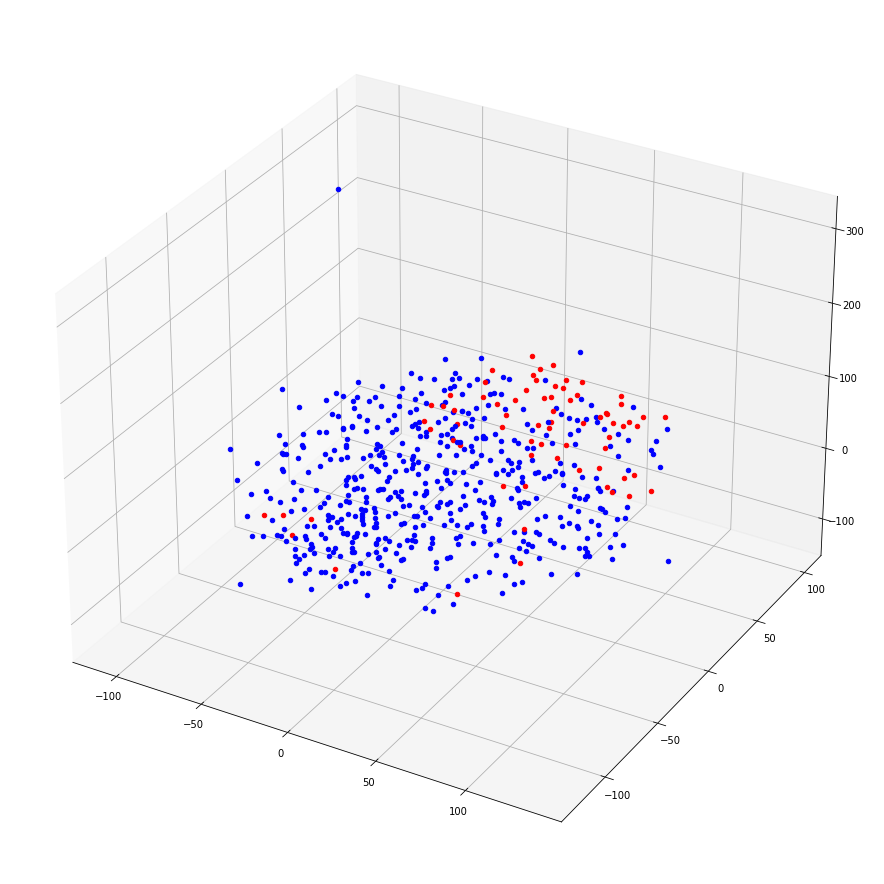

In [43]:
plot_3d_data(X_tsne3, y_temp.to_numpy())

In [44]:
X = select_features(inactive_plus_10_season, features+target)
X

,retirement_age,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,W_pt,L_pt,W-L%_pt,ERA_pt,G_pt,GS_pt,GF_pt,CG_pt,SHO_pt,SV_pt,IP_pt,H_pt,R_pt,ER_pt,HR_pt,BB_pt,SO_pt,BK_pt,WP_pt,BF_pt,ERA+_pt,FIP_pt,WHIP_pt,H9_pt,HR9_pt,BB9_pt,SO9_pt,SO/W_pt,RAA_pt,WAA_pt,WAR_pt,RAR_pt,HoF
0,39,13,1,0,0,142.0,75.0,0.654,3.75,352.0,241.0,68.0,109.0,17.0,16.0,1950.1,1849.0,924.0,813.0,103.0,738.0,1070.0,5.0,68.0,8292.0,113.0,3.63,1.326,8.5,0.5,3.4,4.9,1.45,104.0,10.1,27.9,327.0,0
1,31,10,1,0,0,130.0,101.0,0.563,4.42,333.0,261.0,40.0,126.0,14.0,2.0,1963.1,2230.0,1106.0,964.0,129.0,706.0,594.0,3.0,8.0,8686.0,101.0,4.18,1.495,10.2,0.6,3.2,2.7,0.84,-22.0,-1.7,15.8,202.0,0
2,39,16,1,0,0,75.0,72.0,0.510,3.25,447.0,149.0,124.0,44.0,9.0,33.0,1375.1,1216.0,562.0,496.0,123.0,479.0,856.0,9.0,35.0,5790.0,117.0,3.59,1.232,8.0,0.8,3.1,5.6,1.79,84.0,9.6,21.0,181.0,0
3,44,19,1,0,0,194.0,140.0,0.581,2.76,482.0,354.0,90.0,205.0,44.0,16.0,2995.1,2841.0,1133.0,917.0,67.0,430.0,1036.0,2.0,26.0,11947.0,118.0,2.70,1.092,8.5,0.2,1.3,3.1,2.41,214.0,27.4,50.2,442.0,0
4,31,10,1,0,0,87.0,108.0,0.446,4.25,263.0,254.0,5.0,31.0,6.0,0.0,1674.0,1779.0,880.0,791.0,154.0,620.0,888.0,11.0,53.0,7211.0,99.0,4.25,1.433,9.6,0.8,3.3,4.8,1.43,19.0,4.0,19.7,196.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,34,12,1,0,0,107.0,109.0,0.495,4.10,312.0,300.0,4.0,9.0,4.0,1.0,1863.2,1855.0,900.0,848.0,240.0,569.0,1103.0,3.0,30.0,7889.0,108.0,4.60,1.301,9.0,1.2,2.7,5.3,1.94,92.0,9.8,27.7,313.0,0
575,40,15,1,0,0,132.0,116.0,0.532,4.19,424.0,330.0,34.0,10.0,2.0,0.0,2216.1,2217.0,1096.0,1031.0,309.0,711.0,1480.0,6.0,58.0,9475.0,103.0,4.63,1.321,9.0,1.3,2.9,6.0,2.08,90.0,9.3,27.6,308.0,0
576,44,22,1,0,0,511.0,315.0,0.619,2.63,906.0,815.0,84.0,749.0,76.0,18.0,7356.0,7092.0,3167.0,2147.0,138.0,1217.0,2803.0,3.0,156.0,29565.0,138.0,2.84,1.130,8.7,0.2,1.5,3.4,2.30,1009.0,101.2,165.6,1708.0,1
577,39,13,1,0,0,111.0,109.0,0.505,3.74,304.0,270.0,13.0,79.0,20.0,1.0,1849.0,1978.0,889.0,769.0,149.0,526.0,705.0,4.0,32.0,7798.0,107.0,3.86,1.354,9.6,0.7,2.6,3.4,1.34,32.0,4.1,20.5,204.0,0


In [45]:
X.describe()

,retirement_age,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,W_pt,L_pt,W-L%_pt,ERA_pt,G_pt,GS_pt,GF_pt,CG_pt,SHO_pt,SV_pt,IP_pt,H_pt,R_pt,ER_pt,HR_pt,BB_pt,SO_pt,BK_pt,WP_pt,BF_pt,ERA+_pt,FIP_pt,WHIP_pt,H9_pt,HR9_pt,BB9_pt,SO9_pt,SO/W_pt,RAA_pt,WAA_pt,WAR_pt,RAR_pt,HoF
count,574.000000,574.000000,574.0,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,36.493031,14.482578,1.0,0.008711,0.081882,148.559233,125.655052,0.535923,3.491446,469.489547,296.815331,103.109756,121.388502,19.503484,33.900697,2403.736760,2339.529617,1102.301394,919.702091,158.332753,747.357143,1270.764808,7.304878,59.836237,10102.000000,110.559233,3.569355,1.292355,8.750523,0.624390,2.877700,4.887979,1.757875,106.189895,12.180314,33.119861,328.641115,0.123693
std,3.760146,3.333506,0.0,0.093005,0.274423,65.388428,46.523272,0.053691,0.501415,171.964288,144.980617,143.337762,110.104332,14.422295,68.564683,960.177329,936.509329,462.970662,341.380168,89.570211,302.747621,641.997686,8.124000,44.394798,3987.584387,11.245126,0.470146,0.092422,0.723255,0.290449,0.688036,1.631682,0.621835,126.523927,13.729107,19.888417,198.311300,0.329519
min,28.000000,10.000000,1.0,0.000000,0.000000,35.000000,30.000000,0.372000,1.820000,153.000000,0.000000,0.000000,0.000000,0.000000,0.000000,708.200000,479.000000,252.000000,234.000000,10.000000,162.000000,378.000000,0.000000,1.000000,2168.000000,92.000000,2.020000,1.000000,6.100000,0.100000,0.500000,1.800000,0.660000,-128.000000,-11.200000,15.000000,123.000000,0.000000
25%,34.000000,12.000000,1.0,0.000000,0.000000,104.000000,94.000000,0.502000,3.182500,349.250000,221.500000,23.000000,44.250000,9.000000,4.000000,1756.425000,1694.750000,801.750000,691.250000,94.250000,538.250000,853.750000,2.000000,32.000000,7477.000000,102.250000,3.262500,1.232250,8.300000,0.400000,2.400000,3.600000,1.340000,29.250000,3.925000,19.825000,194.250000,0.000000
50%,36.000000,14.000000,1.0,0.000000,0.000000,133.000000,117.000000,0.532500,3.535000,424.500000,292.000000,53.000000,89.000000,17.000000,10.500000,2191.600000,2188.000000,1012.500000,870.500000,145.500000,707.500000,1127.500000,5.000000,50.000000,9201.500000,108.000000,3.630000,1.293000,8.700000,0.700000,2.800000,4.700000,1.690000,69.000000,8.050000,25.950000,265.500000,0.000000
75%,39.000000,16.000000,1.0,0.000000,0.000000,183.750000,150.000000,0.567000,3.827500,550.750000,371.000000,104.750000,172.000000,27.000000,25.000000,2860.500000,2803.250000,1320.500000,1123.500000,209.000000,888.750000,1528.000000,9.000000,72.000000,12054.750000,116.000000,3.860000,1.354000,9.200000,0.800000,3.300000,5.900000,2.080000,142.000000,16.275000,40.125000,392.750000,0.000000
max,58.000000,27.000000,1.0,1.000000,1.000000,511.000000,315.000000,0.717000,4.990000,1252.000000,815.000000,802.000000,749.000000,110.000000,478.000000,7356.000000,7092.000000,3497.000000,2147.000000,505.000000,2795.000000,5714.000000,90.000000,343.000000,29565.000000,157.000000,5.000000,1.511000,10.800000,1.500000,4.800000,10.900000,5.040000,1009.000000,101.200000,165.600000,1708.000000,1.000000


In [46]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [47]:
hall = X[X['HoF']==1]
no_hall = X[X['HoF']==0]

In [48]:
from Models.functions.stats_bar import stats_bar_plot

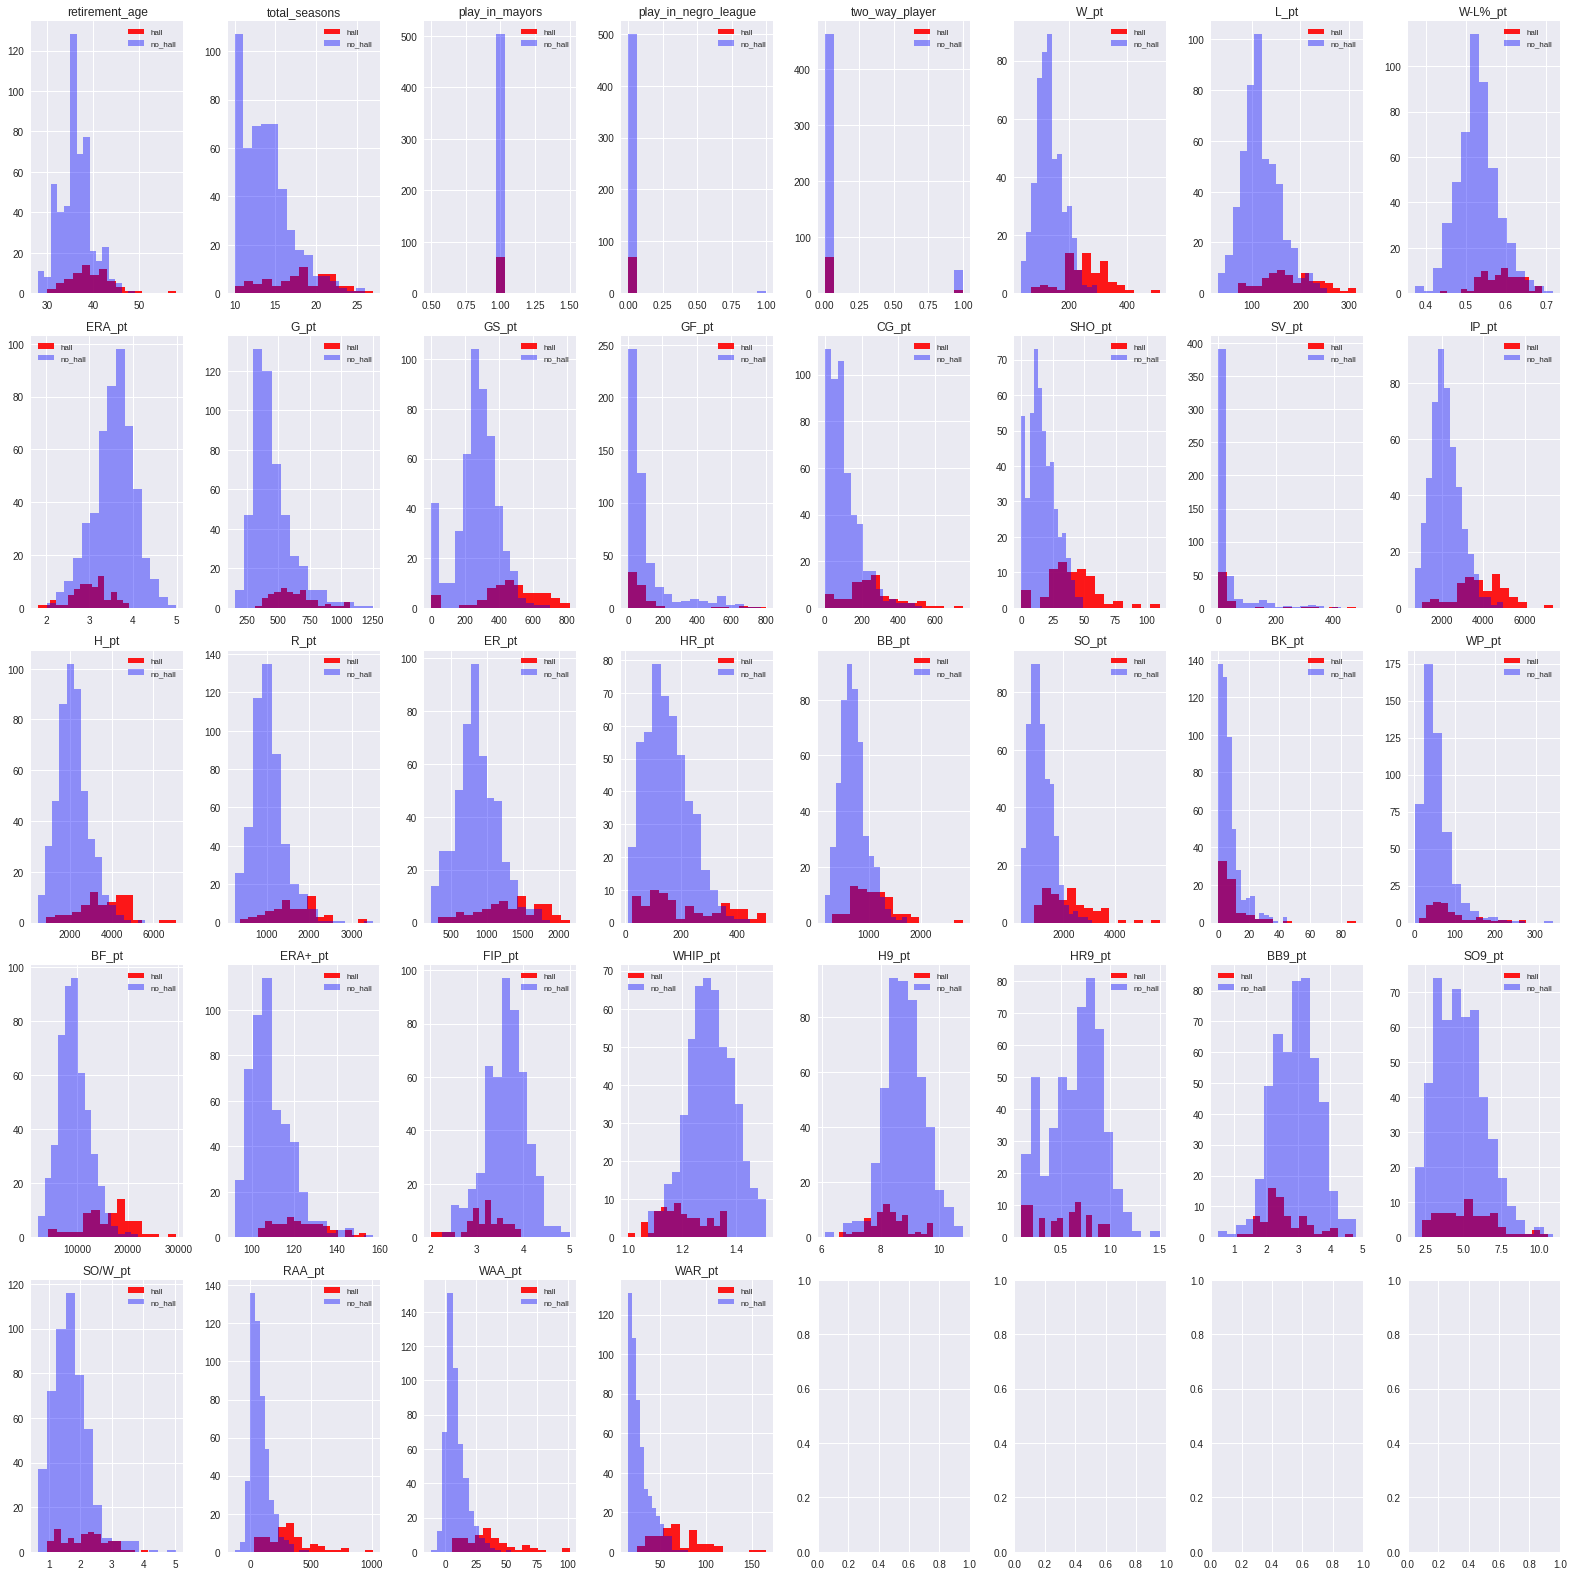

In [49]:
stats_bar_plot(hall, no_hall, features[:-1], 5,8,(22,22))

Las estadisticas defensivas muestran poca diferencia en ambos grupos

In [50]:
of_features = ['retirement_age','total_seasons','play_in_mayors','play_in_negro_league','two_way_player'
            ,'W_pt','L_pt','W-L%_pt','ERA_pt','G_pt','GS_pt','GF_pt','CG_pt','SHO_pt','SV_pt',
            'IP_pt','H_pt','R_pt','ER_pt','HR_pt','BB_pt','SO_pt','BK_pt','WP_pt',
            'BF_pt','ERA+_pt','FIP_pt','WHIP_pt','H9_pt','HR9_pt','BB9_pt','SO9_pt','SO/W_pt',
            'RAA_pt','WAA_pt','WAR_pt','RAR_pt',]

#of_features = ['play_in_mayors','play_in_negro_league','two_way_player'
#            ,'W_pt','L_pt','W-L%_pt','ERA_pt','G_pt','GS_pt','GF_pt','CG_pt','SHO_pt','SV_pt',
#            'IP_pt','H_pt','R_pt','ER_pt','HR_pt','BB_pt','SO_pt',
#            'BF_pt','ERA+_pt','FIP_pt','WHIP_pt','SO/W_pt',
#            'RAA_pt','WAA_pt','WAR_pt','RAR_pt',]

In [51]:
from Models.functions.feature_imp import clasifier_ft_importance_experiments, plot_feature_importance

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [53]:
#X_temp = select_features(inactive_plus_10_season, features)
#y_temp = select_features(inactive_plus_10_season, target)
#
#X_temp.reset_index(drop=True,inplace=True)
#y_temp.reset_index(drop=True,inplace=True)

In [54]:
#rf5_clf = RandomForestClassifier(n_estimators = 5, random_state = 1)
#plot_feature_importance(clasifier_ft_importance_experiments(rf5_clf,X_temp,y_temp).sort_values())

In [55]:
#rf10_clf = RandomForestClassifier(n_estimators = 10, random_state = 1)
#plot_feature_importance(clasifier_ft_importance_experiments(rf10_clf,X_temp,y_temp).sort_values())

In [56]:
#lr_clf = LogisticRegression(solver='liblinear', max_iter=10000)
#plot_feature_importance(clasifier_ft_importance_experiments(lr_clf,X_temp,y_temp,True).sort_values())

Veamos la correlacion de las variables respecto al Target

In [57]:
df = select_features(inactive_plus_10_season, of_features+['HoF'])

df_corr = df.corr()['HoF'].abs().sort_values(ascending=False)
#df_corr

In [58]:
import seaborn as sns
from matplotlib import rcParams

In [59]:
#m_corr = df.corr()
#rcParams['figure.figsize'] = 20,20
#sns.heatmap(m_corr, annot=True)

Vamos a quitarnos aquellos features con alta correlacion, teniendo en cuenta aquellas estadisticas que son sensibles dentro de la eleccion de un jugador a la hora de evaluar su rendimiento

In [60]:
reduced_features = ['total_seasons','WAR_pt', 'WHIP_pt', 'ERA_pt', 'BB_pt','G_pt','W-L%_pt','R_pt','SHO_pt','H_pt' ,'RAA_pt']

In [61]:
df = select_features(inactive_plus_10_season, reduced_features+['HoF'])

df_corr = df.corr()['HoF'].abs().sort_values(ascending=False)
df_corr

HoF              1.000000
WAR_pt           0.683367
RAA_pt           0.625150
SHO_pt           0.539545
H_pt             0.494957
R_pt             0.418160
BB_pt            0.412026
total_seasons    0.385656
WHIP_pt          0.364243
W-L%_pt          0.358806
ERA_pt           0.353767
G_pt             0.334447
Name: HoF, dtype: float64

<AxesSubplot:>

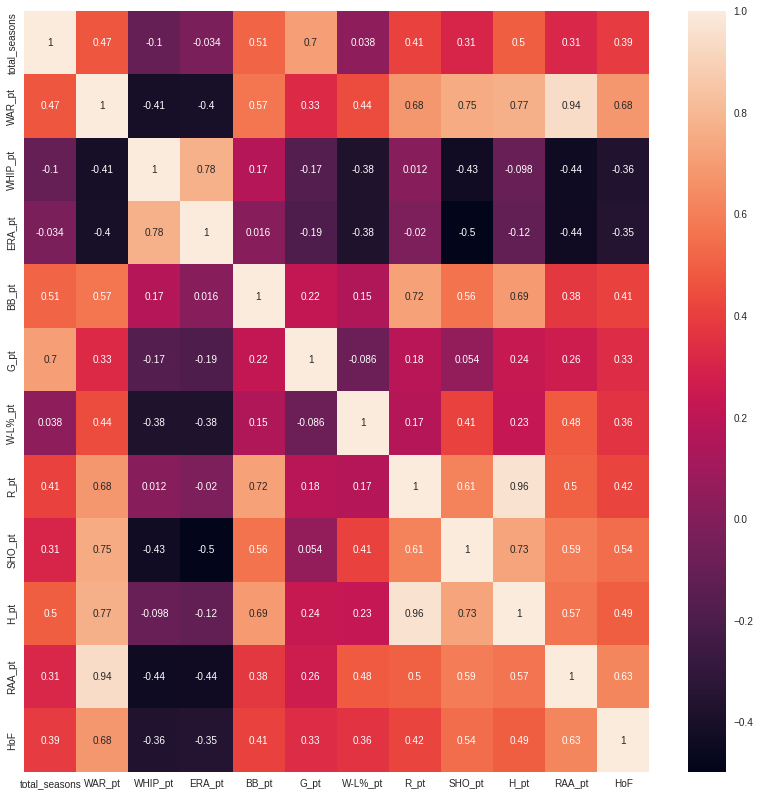

In [62]:
m_corr = df.corr()
rcParams['figure.figsize'] = 14,14
sns.heatmap(m_corr, annot=True)

In [63]:
X_df = select_features(inactive_plus_10_season, reduced_features)
y_df = select_features(inactive_plus_10_season, ['HoF'])

In [64]:
X_df

,total_seasons,WAR_pt,WHIP_pt,ERA_pt,BB_pt,G_pt,W-L%_pt,R_pt,SHO_pt,H_pt,RAA_pt
0,13,27.9,1.326,3.75,738.0,352.0,0.654,924.0,17.0,1849.0,104.0
1,10,15.8,1.495,4.42,706.0,333.0,0.563,1106.0,14.0,2230.0,-22.0
2,16,21.0,1.232,3.25,479.0,447.0,0.510,562.0,9.0,1216.0,84.0
3,19,50.2,1.092,2.76,430.0,482.0,0.581,1133.0,44.0,2841.0,214.0
4,10,19.7,1.433,4.25,620.0,263.0,0.446,880.0,6.0,1779.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...
574,12,27.7,1.301,4.10,569.0,312.0,0.495,900.0,4.0,1855.0,92.0
575,15,27.6,1.321,4.19,711.0,424.0,0.532,1096.0,2.0,2217.0,90.0
576,22,165.6,1.130,2.63,1217.0,906.0,0.619,3167.0,76.0,7092.0,1009.0
577,13,20.5,1.354,3.74,526.0,304.0,0.505,889.0,20.0,1978.0,32.0


In [65]:
X_df.reset_index(inplace=True, drop=True)
y_df.reset_index(inplace=True, drop=True)


In [66]:
print(X_df.index)
y_df.index

RangeIndex(start=0, stop=574, step=1)


RangeIndex(start=0, stop=574, step=1)

In [67]:
X_df.describe()

,total_seasons,WAR_pt,WHIP_pt,ERA_pt,BB_pt,G_pt,W-L%_pt,R_pt,SHO_pt,H_pt,RAA_pt
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,14.482578,33.119861,1.292355,3.491446,747.357143,469.489547,0.535923,1102.301394,19.503484,2339.529617,106.189895
std,3.333506,19.888417,0.092422,0.501415,302.747621,171.964288,0.053691,462.970662,14.422295,936.509329,126.523927
min,10.000000,15.000000,1.000000,1.820000,162.000000,153.000000,0.372000,252.000000,0.000000,479.000000,-128.000000
25%,12.000000,19.825000,1.232250,3.182500,538.250000,349.250000,0.502000,801.750000,9.000000,1694.750000,29.250000
50%,14.000000,25.950000,1.293000,3.535000,707.500000,424.500000,0.532500,1012.500000,17.000000,2188.000000,69.000000
75%,16.000000,40.125000,1.354000,3.827500,888.750000,550.750000,0.567000,1320.500000,27.000000,2803.250000,142.000000
max,27.000000,165.600000,1.511000,4.990000,2795.000000,1252.000000,0.717000,3497.000000,110.000000,7092.000000,1009.000000


In [68]:
print(X_df.shape)
y_df.shape

(574, 11)


(574, 1)

In [69]:
y_df.value_counts()

HoF
0      503
1       71
dtype: int64

Vemos el porcentaje de pertenencia a la clase minoritaria

In [70]:
def percent(a,b):
    print(round((a/(a+b)),3)*100)

percent(71,574)

11.0


El corpus es debalanceado y no es necesaria la separacion por grupos asi que utilizaremos StratifiedKFold para el entrenamiento

Vamos a marcar primero el baseline del problema, utilizando la prediccion negativa para cada jugador

In [71]:
from sklearn.model_selection import train_test_split

X, X_tester, y, y_tester = train_test_split(X_df, y_df,test_size=0.2, shuffle=True, random_state=17)

Vamos a tener una primera idea de como es el comportamiento inicial de los algoritmos frente al corpus sin procesamiento previo

In [72]:
from Models.functions.models_performance_comparer import performance_comparer

In [73]:
X_tester.reset_index(inplace=True, drop=True)
y_tester.reset_index(inplace=True, drop=True)

X.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)

In [74]:
print(X.shape)
y.shape

(459, 11)


(459, 1)

In [75]:
print(y.value_counts())
y_tester.value_counts()

HoF
0      402
1       57
dtype: int64


HoF
0      101
1       14
dtype: int64

Vamos a marcar primero el baseline del problema, utilizando la prediccion negativa para cada jugador

In [76]:
from Models.functions.metrics import show_baseline_score
show_baseline_score(baseline=np.zeros_like(np.ravel(y)), y_val=np.ravel(y))

Accuracy: 0.8758
AUC: 0.5000


Vamos a tener una primera idea de como es el comportamiento inicial de los algoritmos frente al corpus sin procesamiento previo

In [77]:
from Models.functions.models_performance_comparer import performance_comparer_plus

from Models.functions.parameters_selection import model_parameter_optimization

In [78]:
#from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [79]:
dt_params = {'criterion':['gini','entropy'], 'max_depth':[2,3,4,5]}
#dt_clf = model_parameter_optimization(DecisionTreeClassifier(), dt_params, X, y, refit=True)

In [80]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [81]:
lr_params = {'penalty':['l1','l2'], 'tol':[1e-4, 1e-3,1e-2], 'C':np.arange(1,5,0.5), 'max_iter':np.arange(100, 10000, 1000)}
#lr_clf = model_parameter_optimization(LogisticRegression(solver='liblinear'), lr_params, X, np.ravel(y), refit=True)

In [82]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1', max_iter=100, C=2)

In [83]:
rf_params = {'criterion':['gini','entropy'], 'n_estimators':[2,3,4,5]}
#rf_clf = model_parameter_optimization(RandomForestClassifier(max_depth=3), rf_params, X, np.ravel(y), refit=True)

In [84]:
rf_clf = RandomForestClassifier(max_depth=3, criterion='entropy', n_estimators=5)

In [85]:
knn_params = {'n_neighbors':np.arange(2,50)}
#knn_clf = model_parameter_optimization(KNeighborsClassifier(), knn_params, X, np.ravel(y),refit=True)

In [86]:
knn_clf = KNeighborsClassifier(n_neighbors=34)

In [87]:
svmp_params = {'degree':np.arange(2,9), 'C':np.arange(1,4,0.2)}
#svmp_clf = model_parameter_optimization(SVC(kernel='poly',probability=True), svmp_params, X, np.ravel(y),refit=True)

In [88]:
svmp_params = {'C':np.arange(1,10,0.2)}
#svmp_clf = model_parameter_optimization(SVC(kernel='poly',probability=True, degree=4), svmp_params, X, np.ravel(y),refit=True)

In [89]:
svmp_clf = SVC(kernel='poly',probability=True, C=3.8, degree=4)

In [90]:
svmr_params = {'C':np.arange(4,10,0.2)}
#svmr_clf = model_parameter_optimization(SVC(kernel='rbf',probability=True), svmr_params, X, np.ravel(y),refit=True)

In [91]:
svmr_clf = SVC(kernel='rbf',probability=True, C=9.8)

In [92]:
svmr_params = {'C':np.arange(4,10,0.2)}
#svmr_clf = model_parameter_optimization(SVC(kernel='rbf',probability=True), svmr_params, X, np.ravel(y),refit=True)

In [93]:
svmr_clf = SVC(kernel='rbf',probability=True, C=9.8)

In [94]:
models  = [dt_clf, lr_clf, rf_clf, knn_clf, svmp_clf, svmr_clf]
models_labels = ['dt_1', 'lr_1', 'rf_1','knn_1','svmp_1', 'svmr_1']

Model : dt_1


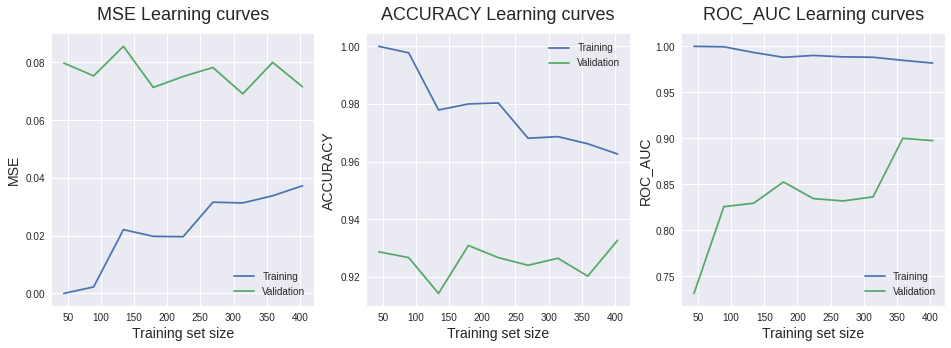

mACC:0.924
mAUC:0.856
<----------------------------------->

Model : lr_1


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinea

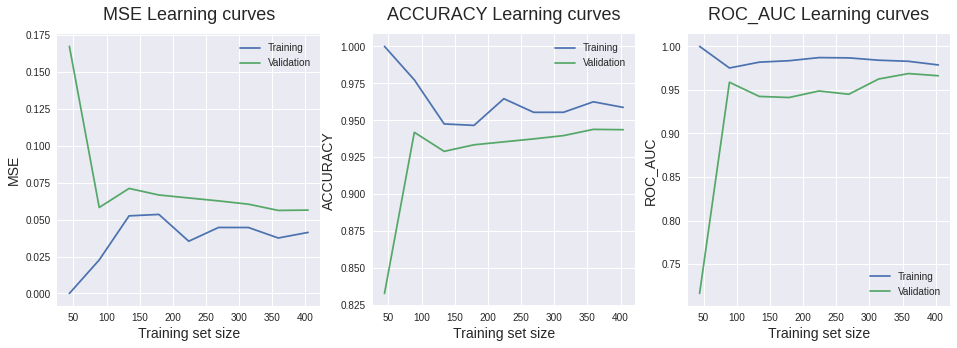

mACC:0.94
mAUC:0.959
<----------------------------------->

Model : rf_1


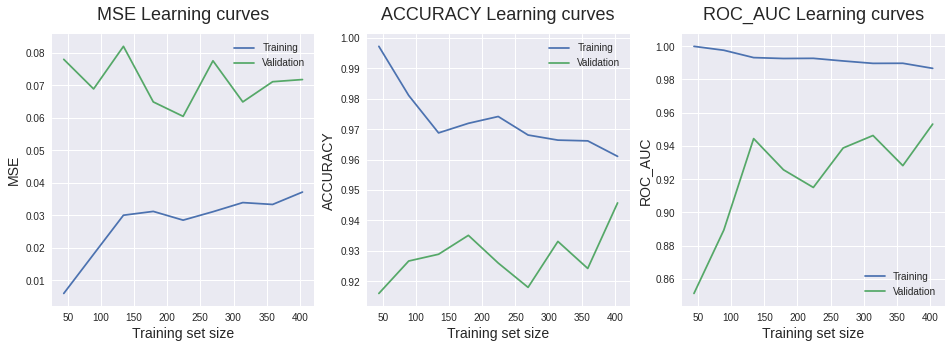

mACC:0.925
mAUC:0.938
<----------------------------------->

Model : knn_1


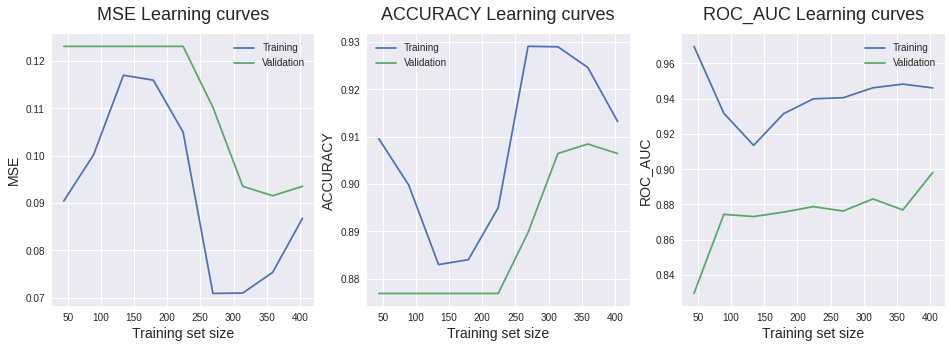

mACC:0.902
mAUC:0.879
<----------------------------------->

Model : svmp_1


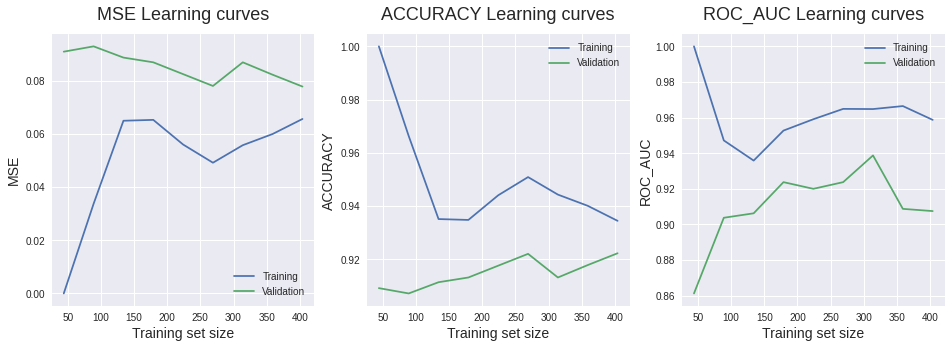

mACC:0.918
mAUC:0.924
<----------------------------------->

Model : svmr_1


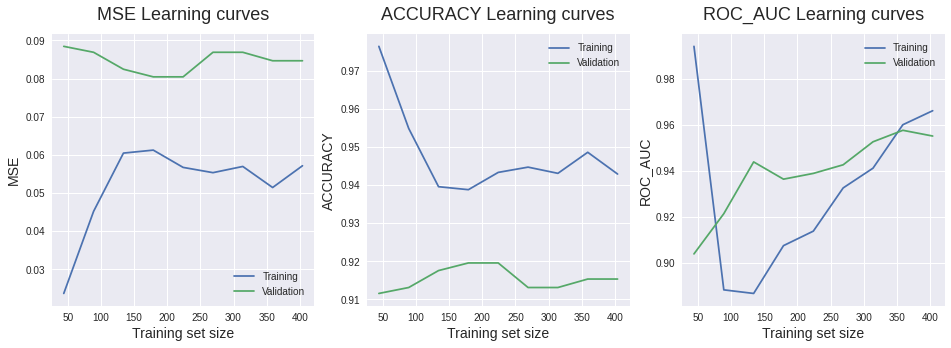

mACC:0.914
mAUC:0.951
<----------------------------------->



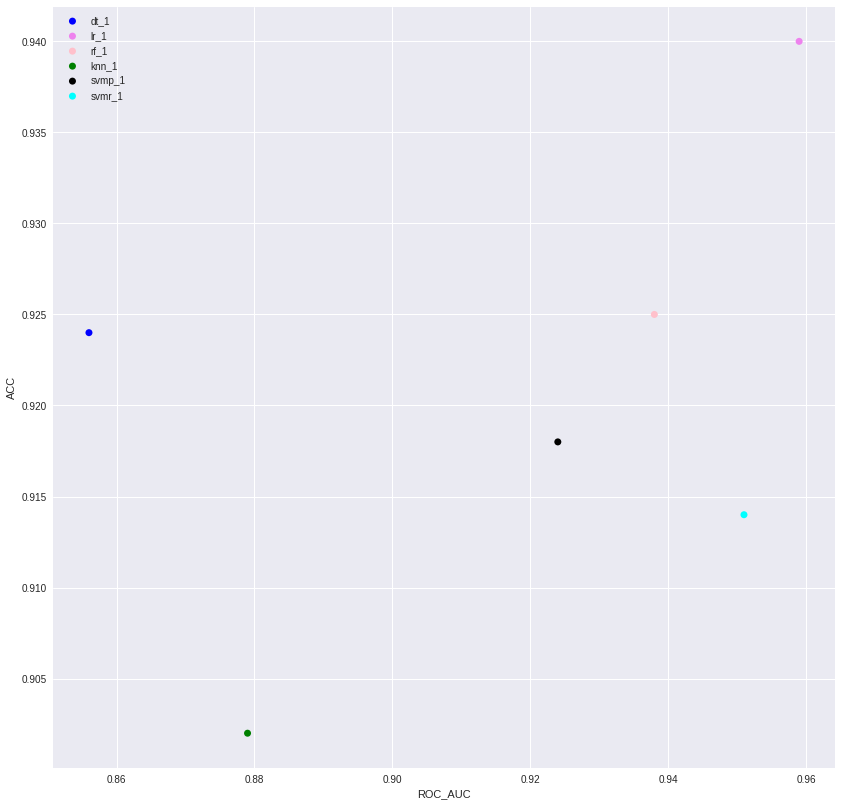

In [95]:
performance_comparer_plus(X, y, models, models_labels)

Vamos a probar con los algoritmos de seleccion de features 

In [96]:
from sklearn.feature_selection import RFE, RFECV

def feature_selection_RFE(clf,X,y,n_features=5):
    rfe = RFE(estimator=clf, n_features_to_select=n_features)
    rfe.fit(X, y)
    for i in range(X.shape[1]):
        if rfe.support_[i]:
    	    print(f'Feature: {X.columns[i]}, Rank: {rfe.ranking_[i]}')

In [97]:
feature_selection_RFE(DecisionTreeClassifier(max_depth=3),X, np.ravel(y), 10)

Feature: total_seasons, Rank: 1
Feature: WAR_pt, Rank: 1
Feature: ERA_pt, Rank: 1
Feature: BB_pt, Rank: 1
Feature: G_pt, Rank: 1
Feature: W-L%_pt, Rank: 1
Feature: R_pt, Rank: 1
Feature: SHO_pt, Rank: 1
Feature: H_pt, Rank: 1
Feature: RAA_pt, Rank: 1


In [98]:
from numpy import mean
def automatic_feature_selection(estimators, X, y, n_repetition):
    features_selected  = {}
    count = 0
    for est in estimators:
        rfecv = RFECV(estimator=est)
        for r in range(n_repetition):
            count+=1
            rfecv.fit(X, np.ravel(y))
            for i in range(X.shape[1]):
                if rfecv.support_[i]:
                    feat = X.columns[i]
                    rank = rfecv.ranking_[i]
                    if features_selected.get(feat) == None:
                        features_selected[feat] = [1,rank]
                    else:
                        features_selected[feat][0]+=1
                        features_selected[feat][1]+=rank
    s_features = []
    for feat in features_selected.keys():
        n_selection = features_selected[feat][0]
        m_rank = features_selected[feat][1]/n_selection
        m_selection = (features_selected[feat][0]/count)*100
        s_features.append((feat,m_selection,m_rank))
    s_features.sort(key=lambda x: x[1], reverse=True)
    print(f"Total selections:{count}")
    return s_features
        

Vamos a standarizar los datos

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
sc = StandardScaler()
X_st = sc.fit_transform(X)

Vamos a ver que representacion queda de la reduccion de dimensiones

In [101]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_st)

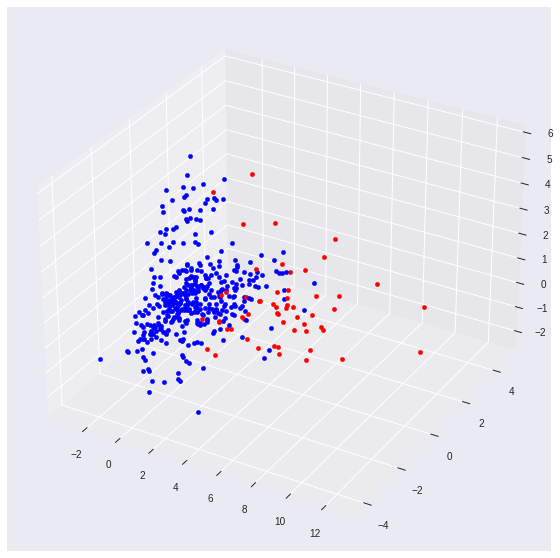

In [102]:
plot_3d_data(X_pca3, y.to_numpy(), (10,10))

In [103]:
X_tsne3 = TSNE(n_components=3).fit_transform(X_st)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


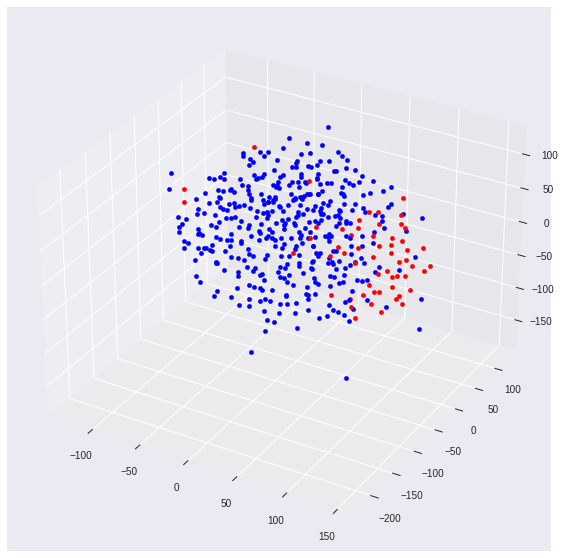

In [104]:
plot_3d_data(X_tsne3, y.to_numpy(), (10,10))

In [105]:
models_labels2 =  [l+'_st' for l in models_labels]

Model : dt_1_st


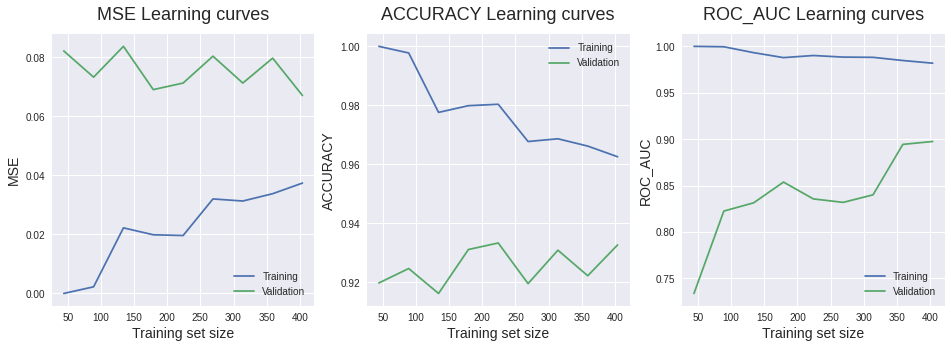

mACC:0.924
mAUC:0.855
<----------------------------------->

Model : lr_1_st


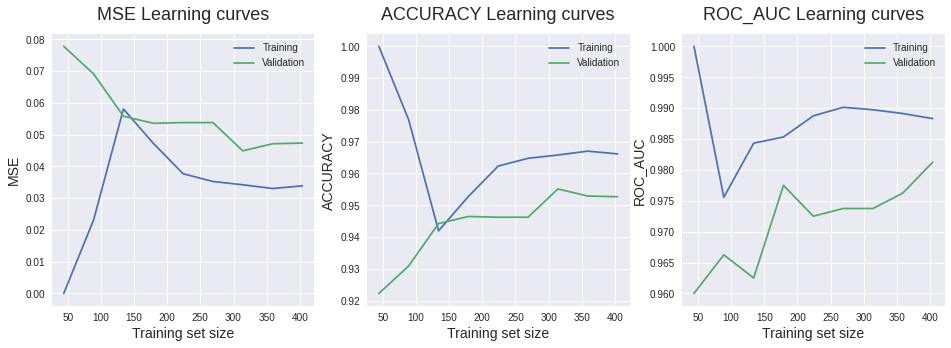

mACC:0.951
mAUC:0.975
<----------------------------------->

Model : rf_1_st


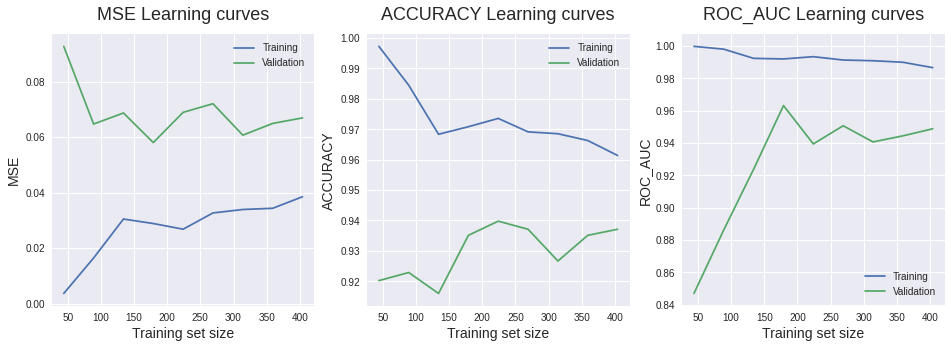

mACC:0.933
mAUC:0.945
<----------------------------------->

Model : knn_1_st


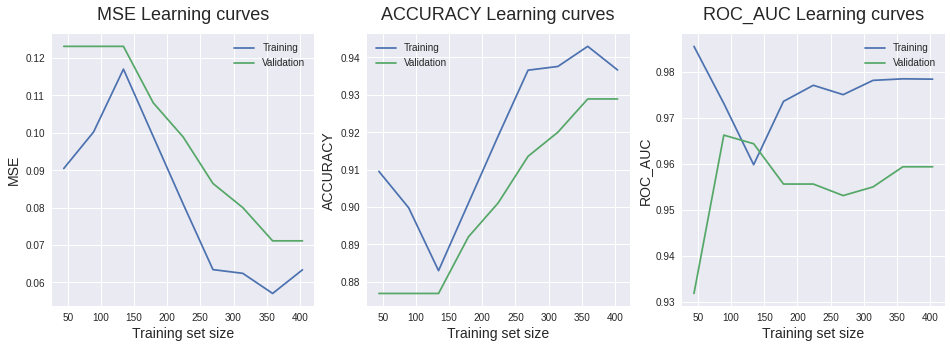

mACC:0.921
mAUC:0.956
<----------------------------------->

Model : svmp_1_st


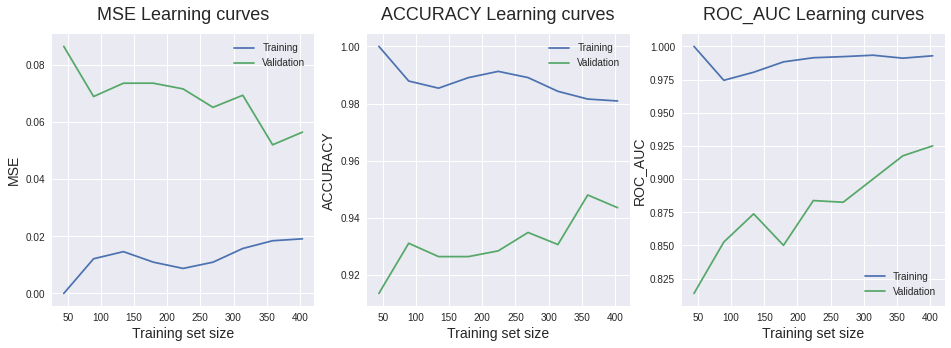

mACC:0.938
mAUC:0.9
<----------------------------------->

Model : svmr_1_st


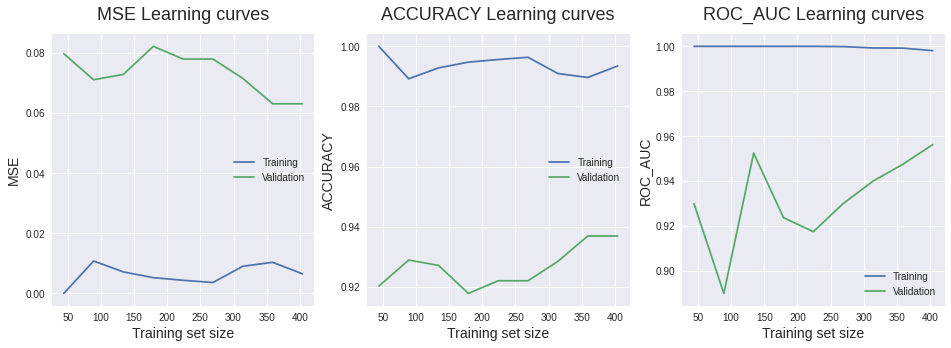

mACC:0.929
mAUC:0.939
<----------------------------------->



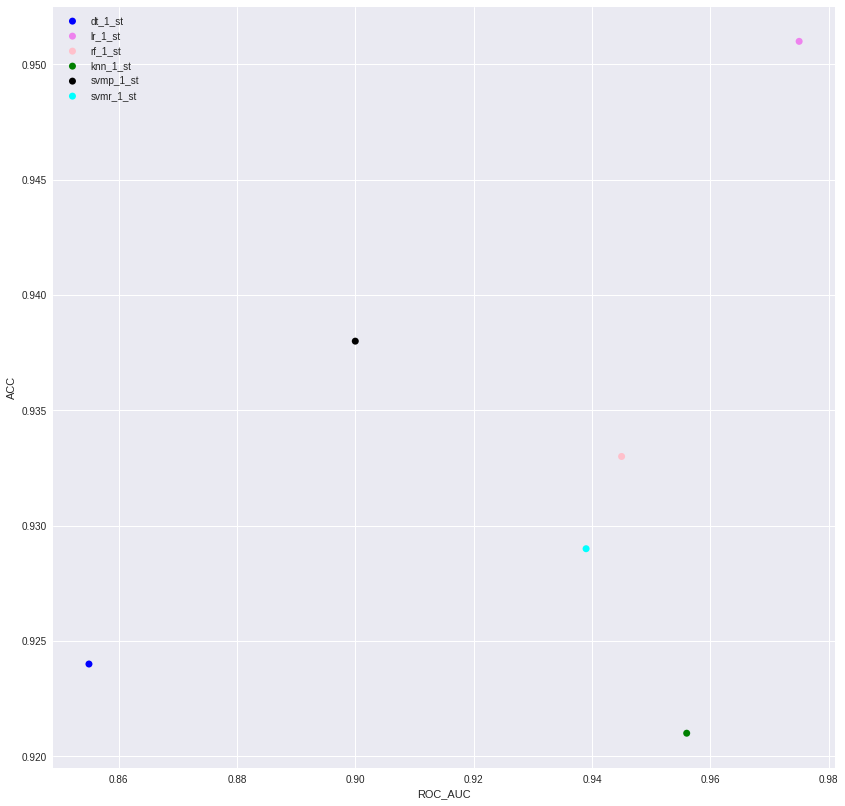

In [106]:
performance_comparer_plus(X_st, y, models, models_labels2)

In [107]:
from sklearn.pipeline import Pipeline
_sc = StandardScaler()

_model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=100, C=2)
log_reg_std_model = Pipeline([
    ('std_scaler', _sc),
    ('regressor', _model)
])
    
_model = RandomForestClassifier(max_depth=3, criterion='entropy', n_estimators=5)
randF_std_model = Pipeline([
    ('std_scaler', _sc),
    ('regressor', _model)
])

Vamos a utilizar las tecnicas de reduccion de dimensiones para buscar una mejora en los performance

In [108]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [109]:
lda = LinearDiscriminantAnalysis()
X_lda_r = lda.fit_transform(X_st, y)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [110]:
dt_lda_params = {'criterion':['gini','entropy'], 'max_depth':[3,4,5]}
dt_lda_clf = model_parameter_optimization(DecisionTreeClassifier(), dt_lda_params, X_lda_r, y, refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': 3} : 0.9557234432234433 roc_auc


In [111]:
lr_lda_params = {'penalty':['l1','l2'], 'C':np.arange(1,3,0.2), 'max_iter':np.arange(100, 1200, 500)}
lr_lda_clf = model_parameter_optimization(LogisticRegression(solver='liblinear'), lr_lda_params, X_lda_r, np.ravel(y), refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 1.0, 'max_iter': 100, 'penalty': 'l1'} : 0.9774725274725274 roc_auc


In [112]:
rf_lda_params = {'n_estimators':[3,4,5,6,7,8,9,10,11]}
rf_lda_clf = model_parameter_optimization(RandomForestClassifier(criterion='entropy', max_depth=3), rf_lda_params, X_lda_r, np.ravel(y), refit=True)


Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'n_estimators': 9} : 0.967857142857143 roc_auc


In [113]:
knn_lda_params = {'n_neighbors':np.arange(5,100)}
knn_lda_clf = model_parameter_optimization(KNeighborsClassifier(), knn_lda_params, X_lda_r, np.ravel(y),refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'n_neighbors': 38} : 0.9804945054945055 roc_auc


In [114]:
svmp_lda_params = {'degree':np.arange(1,3), 'C':np.arange(1,5.6,0.2)}
svmp_lda_clf = model_parameter_optimization(SVC(kernel='poly',probability=True), svmp_lda_params, X_lda_r, np.ravel(y),refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 1.0, 'degree': 1} : 0.9774725274725274 roc_auc


In [115]:
models_lda = [dt_lda_clf,lr_lda_clf, rf_lda_clf, knn_lda_clf, svmp_lda_clf]

Model : dt_1_st_lda


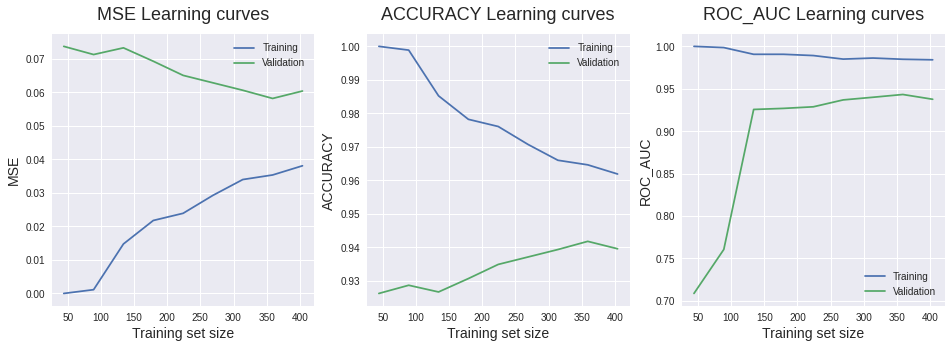

mACC:0.939
mAUC:0.94
<----------------------------------->

Model : lr_1_st_lda


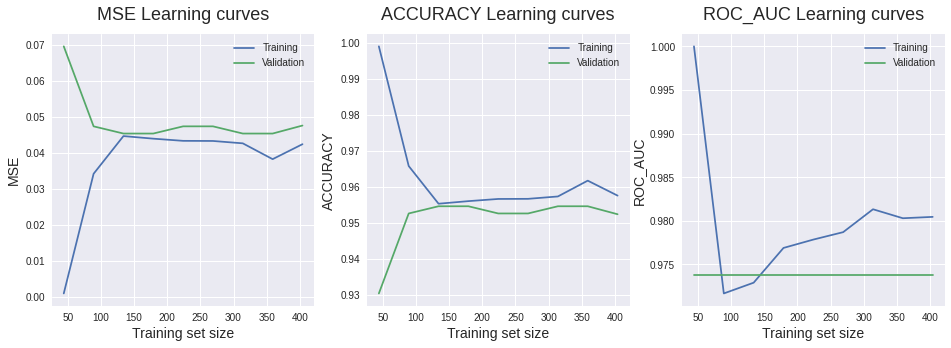

mACC:0.954
mAUC:0.974
<----------------------------------->

Model : rf_1_st_lda


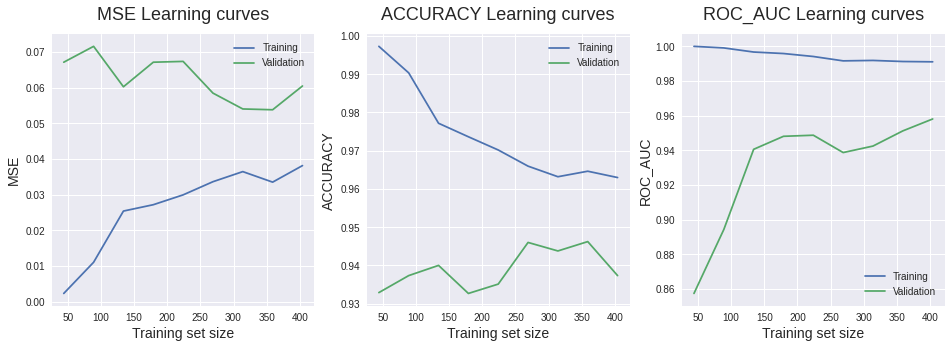

mACC:0.945
mAUC:0.944
<----------------------------------->

Model : knn_1_st_lda


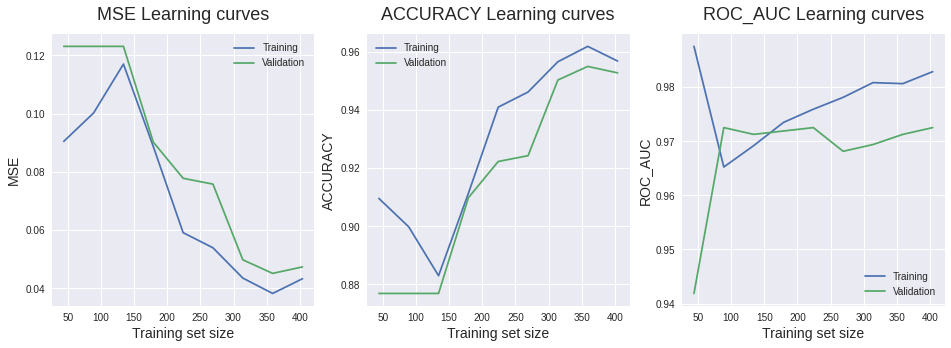

mACC:0.943
mAUC:0.97
<----------------------------------->

Model : svmp_1_st_lda


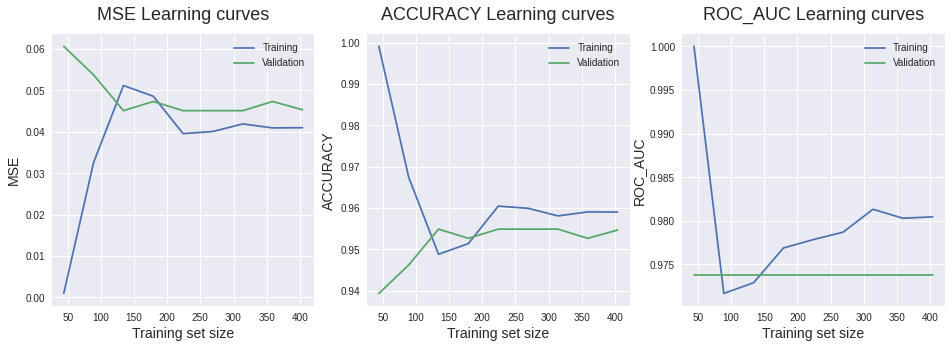

mACC:0.954
mAUC:0.974
<----------------------------------->



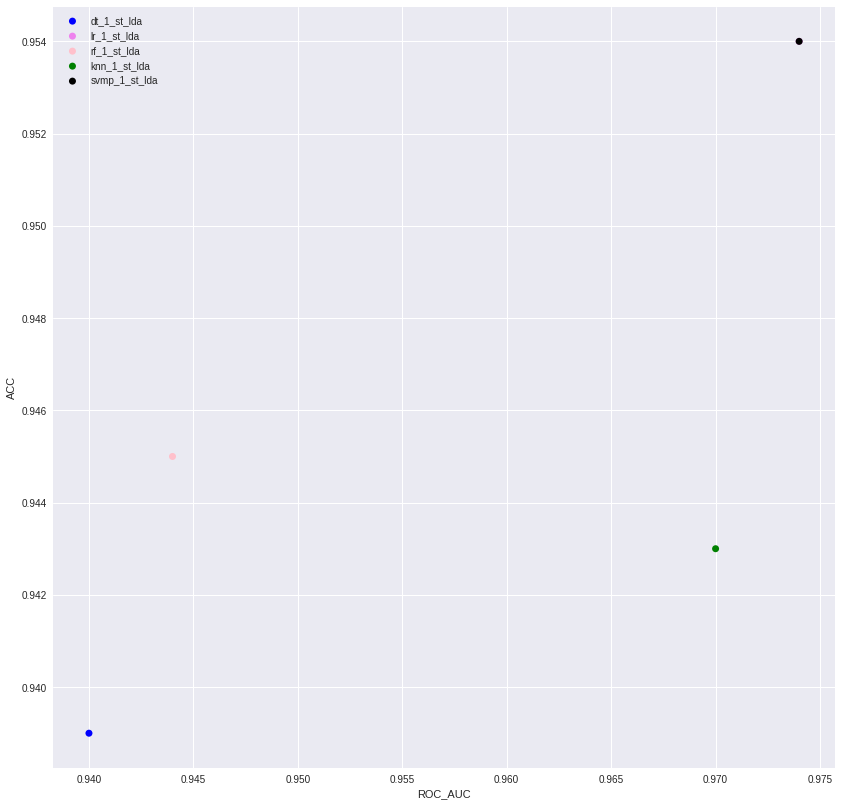

In [116]:
models_labelLDA = [l+'_lda' for l in models_labels2[:-1]]
performance_comparer_plus(X_lda_r, y, models_lda, models_labelLDA)

In [117]:
_lda = LinearDiscriminantAnalysis()

_model = LogisticRegression(solver='liblinear',C=1.0, max_iter=100,penalty='l1')
log_reg_lda_model = Pipeline([
    ('std_scaler', _sc),
    ('lda', _lda),
    ('regressor', _model)
])

_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_lda_model = Pipeline([
    ('std_scaler', _sc),
    ('lda', _lda),
    ('regressor', _model)
])

_model = RandomForestClassifier(n_estimators=11)
randoF_lda_model = Pipeline([
    ('std_scaler', _sc),
    ('lda', _lda),
    ('regressor', _model)
])

_model = SVC(kernel='poly',probability=True,degree=1, C=1)
svm_lda_model = Pipeline([
    ('std_scaler', _sc),
    ('lda', _lda),
    ('regressor', _model)
])


In [118]:
pca = PCA()
pca.fit(X_st)

PCA()

In [119]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 47.02248493  67.17507727  80.08983683  86.41060101  91.13866139
  94.46041835  97.04829756  98.63217818  99.77556532  99.95075868
 100.        ]



Text(0, 0.5, 'Explained variance (%)')

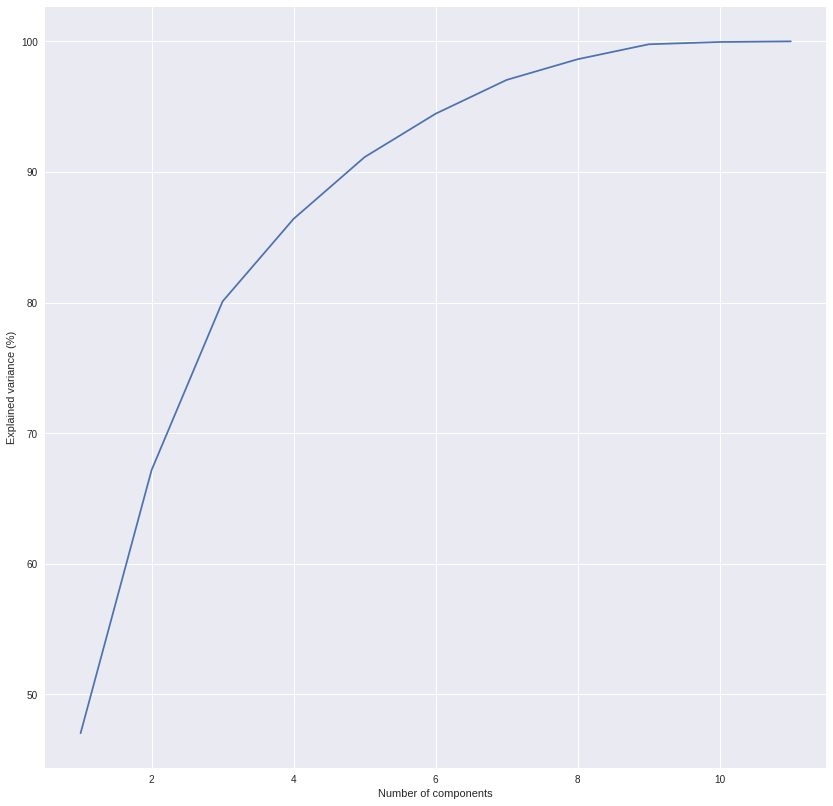

In [120]:
# plot a scree plot
components = None
components = len(pca.explained_variance_ratio_) if components is None else components
plt.plot(range(1,components+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[47.02248493 67.17507727 80.08983683 86.41060101 91.13866139]
Number of components: 5


Text(0, 0.5, 'Explained variance (%)')

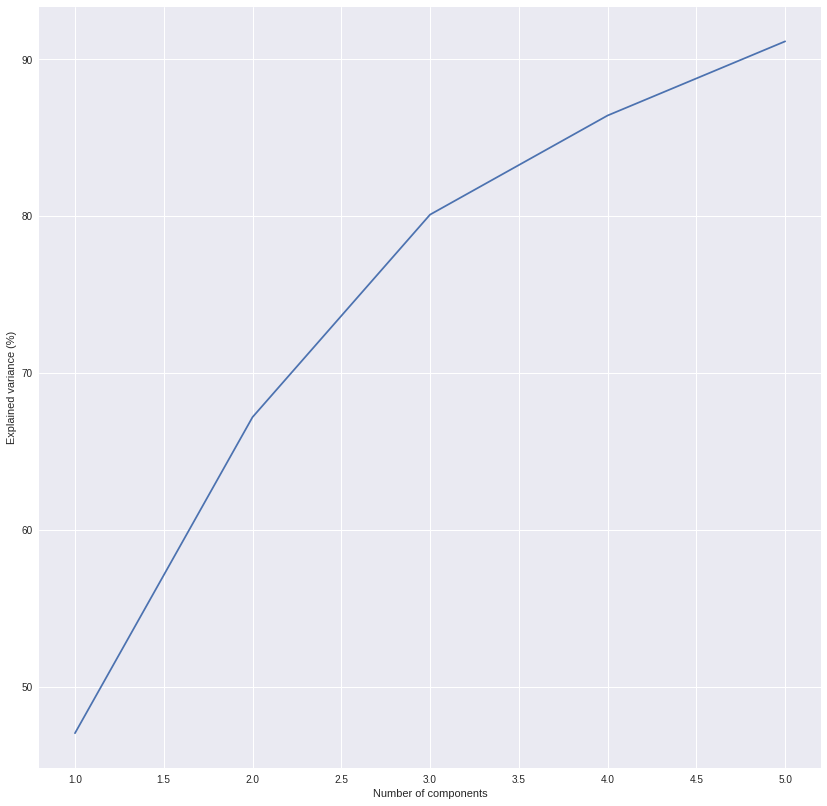

In [121]:
pca = PCA(n_components = 0.9)
pca.fit(X_st)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [122]:
X_pca = pca.transform(X_st)
X_pca.shape

(459, 5)

In [123]:
dt_pca_params = {'criterion':['gini','entropy'], 'max_depth':[3,4]}
dt_pca_clf = model_parameter_optimization(DecisionTreeClassifier(), dt_pca_params, X_pca, y, refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': 3} : 0.9199175824175824 roc_auc


In [124]:
lr_pca_params = {'penalty':['l1','l2'], 'C':np.arange(1,5,0.2), 'max_iter':np.arange(100, 1200, 500)}
lr_pca_clf = model_parameter_optimization(LogisticRegression(solver='liblinear'), lr_pca_params, X_pca, np.ravel(y), refit=True)


Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 2.5999999999999996, 'max_iter': 100, 'penalty': 'l2'} : 0.984065934065934 roc_auc


In [125]:
rf_pca_params = {'n_estimators':[3,4,5,6,7,8]}
rf_pca_clf = model_parameter_optimization(RandomForestClassifier(criterion='entropy', max_depth=3), rf_pca_params, X_pca, np.ravel(y), refit=True)


Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'n_estimators': 7} : 0.9643772893772894 roc_auc


In [126]:
knn_pca_params = {'n_neighbors':np.arange(10,100)}
knn_pca_clf = model_parameter_optimization(KNeighborsClassifier(), knn_pca_params, X_pca, np.ravel(y),refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'n_neighbors': 75} : 0.9732142857142858 roc_auc


In [127]:
svmp_pca_params = {'degree':np.arange(1,4), 'C':np.arange(1,5.6,0.5)}
svmp_pca_clf = model_parameter_optimization(SVC(kernel='poly',probability=True), svmp_pca_params, X_pca, np.ravel(y), cv=20,refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 2.5, 'degree': 1} : 0.9908928571428571 roc_auc


In [128]:
svmr_pca_params = {'C':np.arange(1,10,1)}
svmr_pca_clf = model_parameter_optimization(SVC(kernel='rbf',probability=True), svmr_pca_params, X_pca, np.ravel(y), cv=20,refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 1} : 0.9658928571428571 roc_auc


In [129]:
models_pca = [dt_pca_clf,lr_pca_clf, rf_pca_clf, knn_pca_clf, svmp_pca_clf, svmr_pca_clf]

Model : dt_1_st_pca


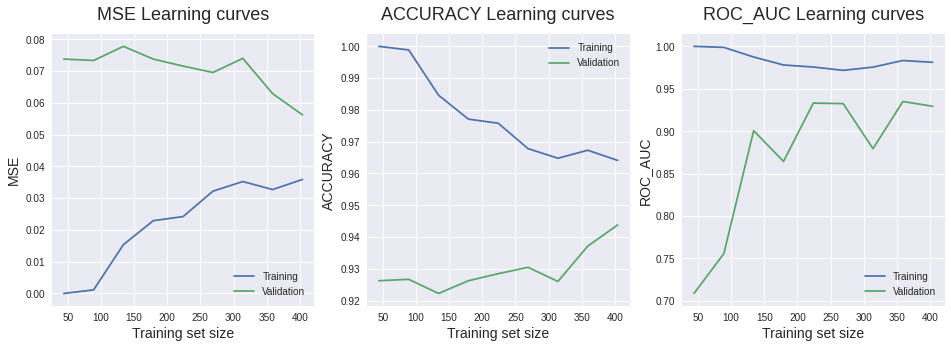

mACC:0.931
mAUC:0.916
<----------------------------------->

Model : lr_1_st_pca


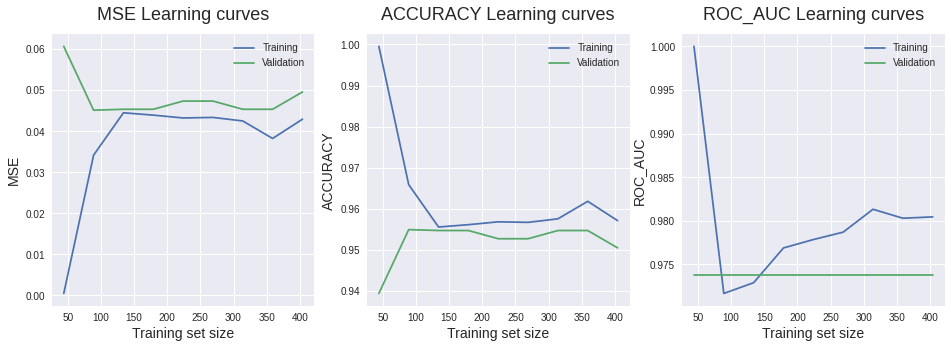

mACC:0.954
mAUC:0.974
<----------------------------------->

Model : rf_1_st_pca


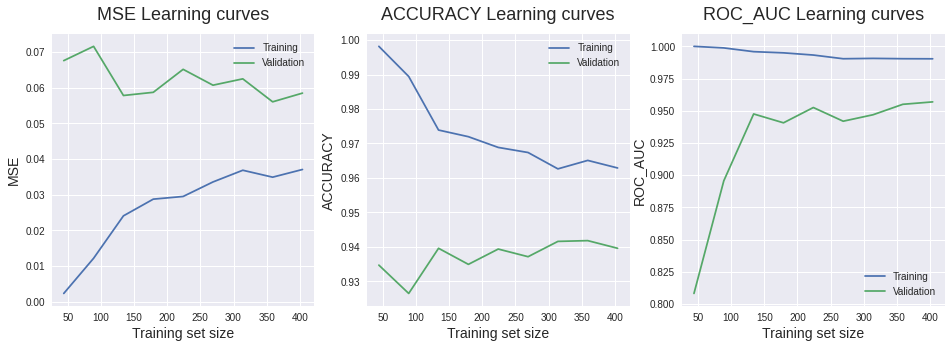

mACC:0.94
mAUC:0.948
<----------------------------------->

Model : knn_1_st_pca


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 219, in predict
    neigh

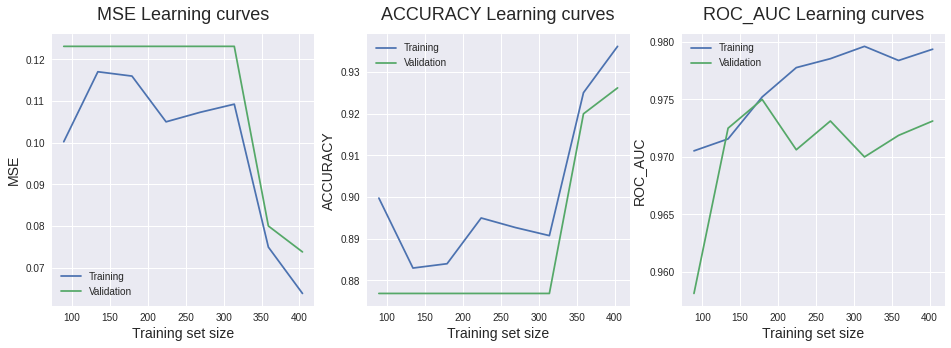

mACC:0.891
mAUC:0.972
<----------------------------------->

Model : svmp_1_st_pca


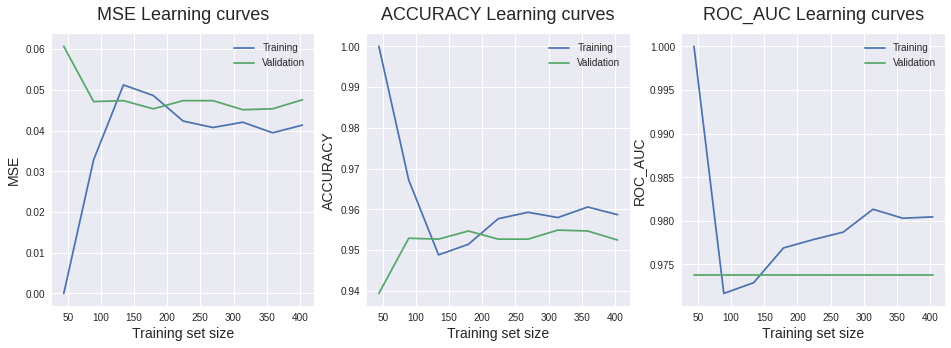

mACC:0.954
mAUC:0.974
<----------------------------------->

Model : svmr_1_st_pca


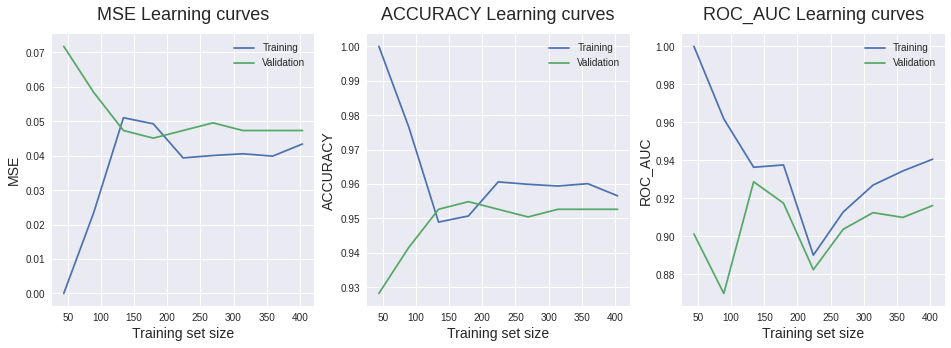

mACC:0.952
mAUC:0.909
<----------------------------------->



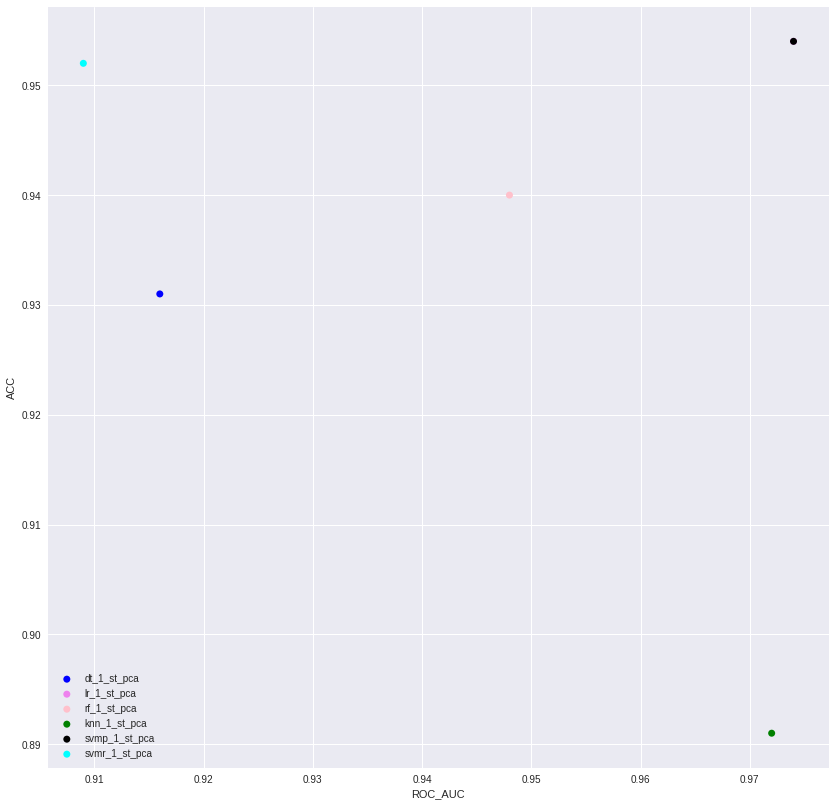

In [130]:
models_labelPCA = [l+'_pca' for l in models_labels2]
performance_comparer_plus(X_lda_r, y, models_pca, models_labelPCA)

In [131]:
_pca = PCA(n_components = components)
_model =  LogisticRegression(solver='liblinear', C=1.0, max_iter=100, penalty='l2')
log_reg_pca_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])
_model = SVC(kernel='poly',probability=True,C=5.5, degree=1)
svmp_pca_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])
_model = SVC(kernel='rbf',probability=True, C=1)
svmr_pca_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [132]:
#No modification
log_reg_model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000, C=2)
randF_model = RandomForestClassifier(max_depth=3, criterion='entropy', n_estimators=5)
svmp_model = SVC(kernel='poly',probability=True, C=3.8, degree=4)

Model : log_reg_model


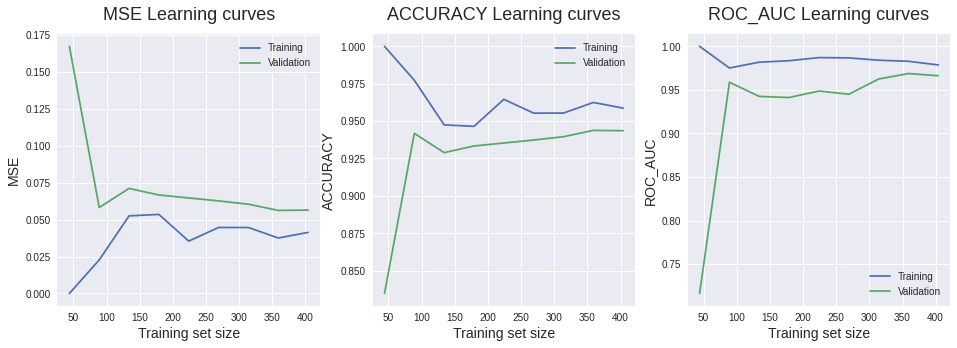

mACC:0.94
mAUC:0.959
<----------------------------------->

Model : randF_model


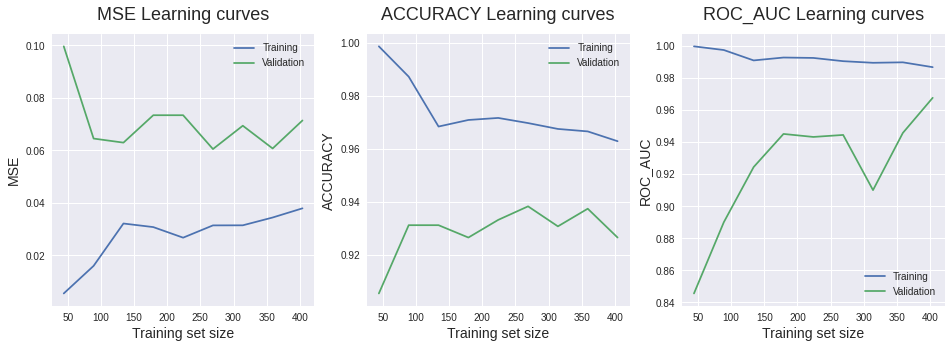

mACC:0.935
mAUC:0.933
<----------------------------------->

Model : svmp_model


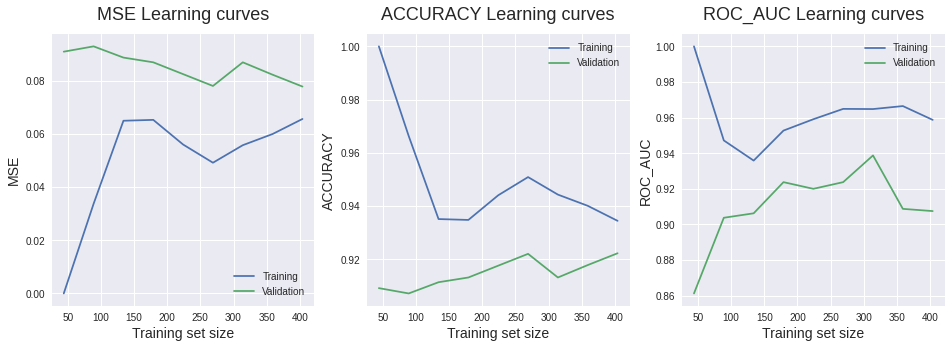

mACC:0.918
mAUC:0.924
<----------------------------------->

Model : log_reg_std_model


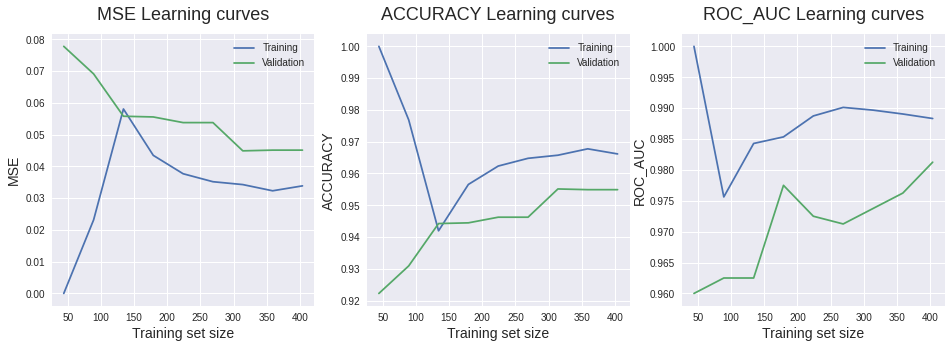

mACC:0.952
mAUC:0.974
<----------------------------------->

Model : log_reg_lda_model


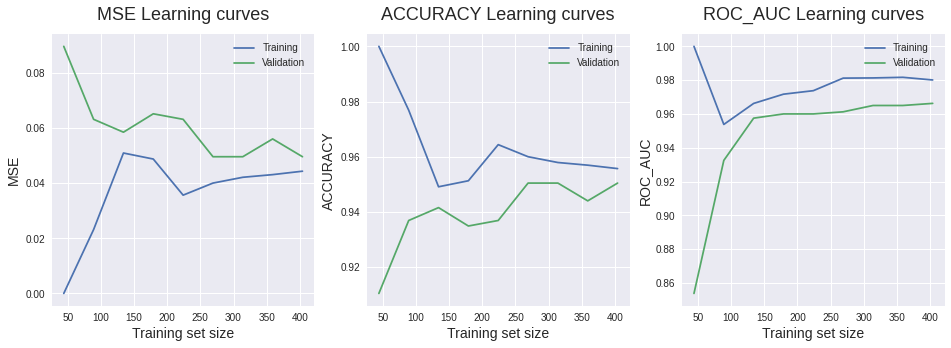

mACC:0.948
mAUC:0.964
<----------------------------------->

Model : dt_lda_model


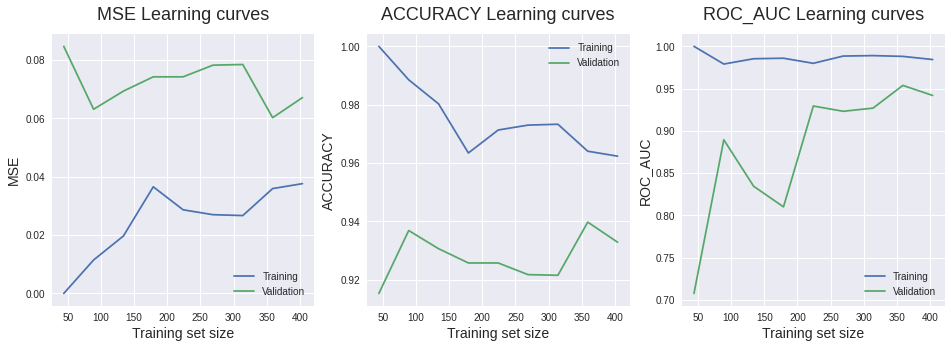

mACC:0.928
mAUC:0.935
<----------------------------------->

Model : svm_lda_model


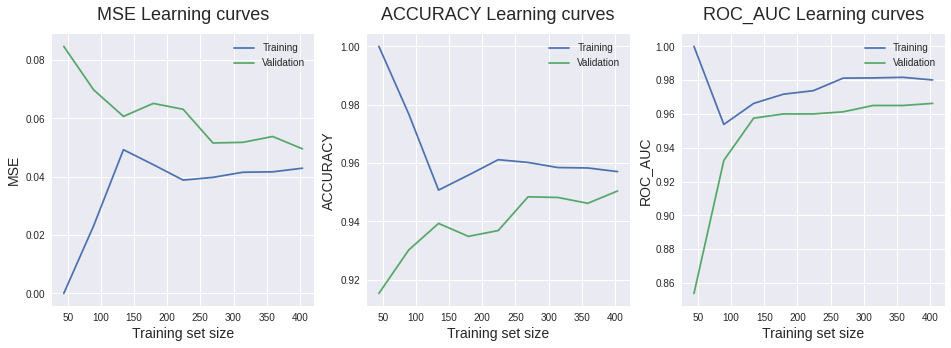

mACC:0.948
mAUC:0.964
<----------------------------------->

Model : log_reg_pca_model


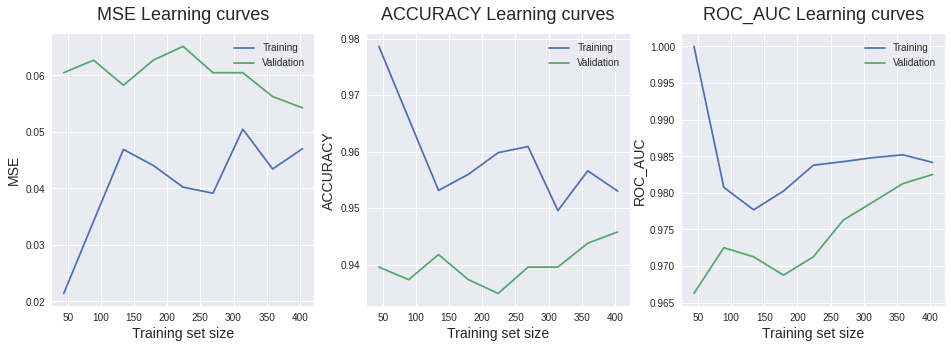

mACC:0.941
mAUC:0.979
<----------------------------------->

Model : svmp_pca_model


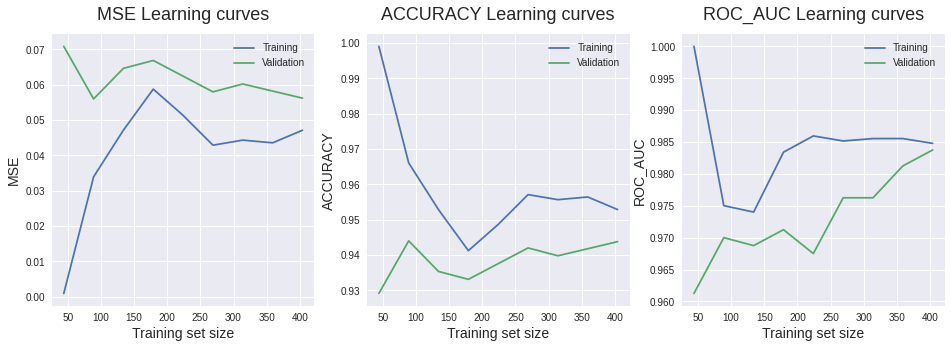

mACC:0.941
mAUC:0.978
<----------------------------------->

Model : svmr_pca_model


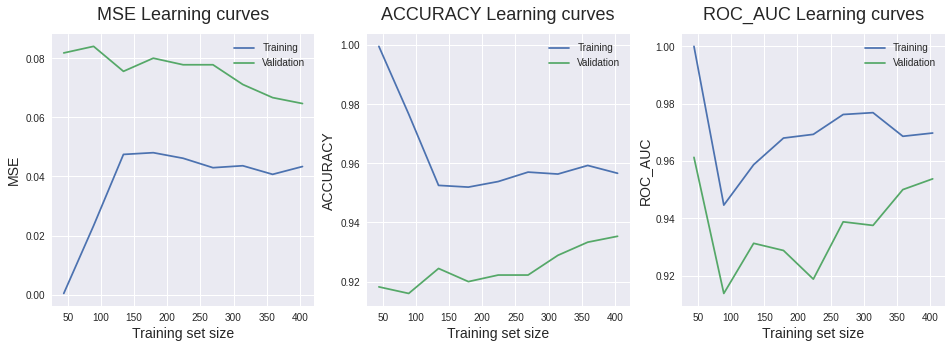

mACC:0.928
mAUC:0.942
<----------------------------------->



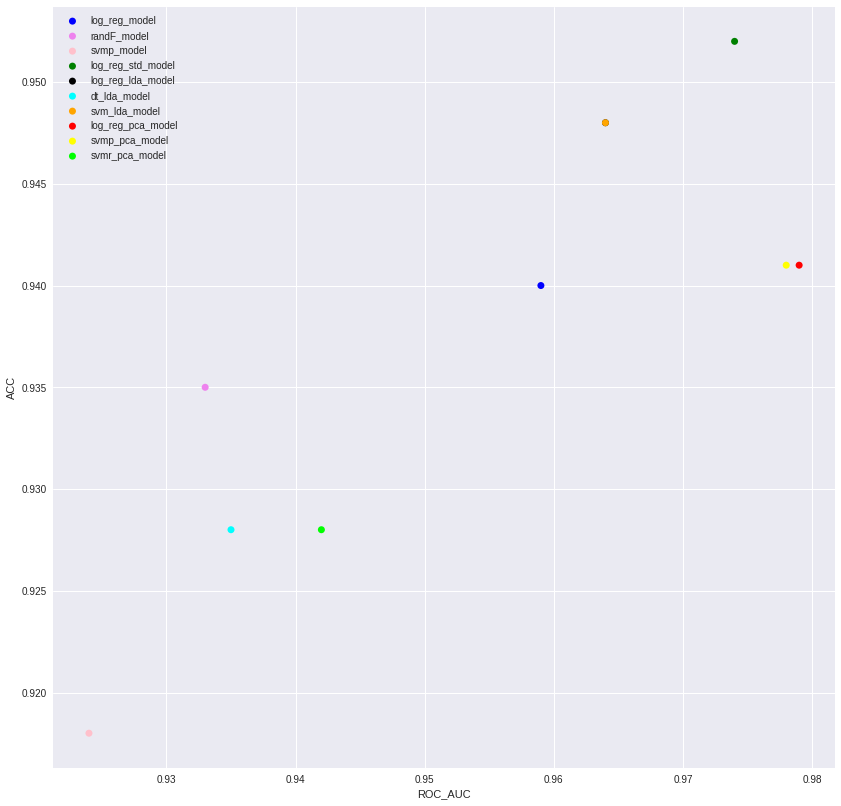

In [133]:
models_ = [log_reg_model,randF_model,svmp_model,log_reg_std_model,log_reg_lda_model,dt_lda_model,
svm_lda_model,log_reg_pca_model,svmp_pca_model,svmr_pca_model]

labels_ = ['log_reg_model','randF_model','svmp_model','log_reg_std_model','log_reg_lda_model','dt_lda_model',
'svm_lda_model','log_reg_pca_model','svmp_pca_model','svmr_pca_model']

performance_comparer_plus(X, y, models_, labels_)

In [134]:
#Final selection

#No Modificaiton
log_reg_model.fit(X,y)
svmp_model.fit(X,y)

#Standariation
log_reg_std_model.fit(X,y)

#Reduction 
  #lda
log_reg_lda_model.fit(X,y)
dt_lda_model.fit(X,y)
svm_lda_model.fit(X,y)

    #pca
svmr_pca_model.fit(X,y)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('regressor', SVC(C=1, probability=True))])

In [135]:
from summaries import summary

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
summary(log_reg_model, X_tester, y_tester, 'Log_reg_model')

Clasificador --> Log_reg_model
--------------------------
ACC:93.043
AUC: 0.9293
---------------------------


In [138]:
summary(log_reg_std_model, X_tester, y_tester, 'Log_reg_std_model')

Clasificador --> Log_reg_std_model
--------------------------
ACC:93.043
AUC: 0.896
---------------------------


In [139]:
summary(svmp_model, X_tester, y_tester, 'SVMp_model')

Clasificador --> SVMp_model
--------------------------
ACC:92.174
AUC: 0.9088
---------------------------


In [140]:
summary(log_reg_lda_model, X_tester, y_tester, 'Log_reg_lda_model')

Clasificador --> Log_reg_lda_model
--------------------------
ACC:93.043
AUC: 0.9137
---------------------------


In [141]:
summary(dt_lda_model, X_tester, y_tester, 'dt_lda_model')


Clasificador --> dt_lda_model
--------------------------
ACC:90.435
AUC: 0.8497
---------------------------


In [142]:
summary(svm_lda_model, X_tester, y_tester, 'svm_lda_model')

Clasificador --> svm_lda_model
--------------------------
ACC:93.043
AUC: 0.9137
---------------------------


In [143]:
summary(svmr_pca_model, X_tester, y_tester, 'svmr_pca_model')

Clasificador --> svmr_pca_model
--------------------------
ACC:92.174
AUC: 0.9257
---------------------------


In [144]:
mayor_league_condition = {
    'play_in_mayors':[1]
}
test_gt_condition = {
    'WAR_pt':10,
    "total_seasons":10,
    'retirament_decade':2010
}

recent_retirement_df = filter_dataset(inactive_pit_df, mayor_league_condition, test_gt_condition, None, None)

In [145]:
recent_retirement_df.shape

(137, 60)

In [146]:
Inactives_features = recent_retirement_df[reduced_features]
Inactives_targets = recent_retirement_df["HoF"]

In [147]:
Inactives_targets.value_counts()

0    134
1      3
Name: HoF, dtype: int64

In [161]:
print(f"svm_lda_model: {svm_lda_model.score(Inactives_features, Inactives_targets)}") 


svm_lda_model: 0.9854014598540146


In [162]:
def compute_prediction(model,X_u, y_u,Indexer,only_pred=False):
    computes = []
    for i in range(len(X_u)):
        p_pred = model.predict_proba(X_u.iloc[i].to_numpy().reshape(1,-1))
        hof = y_u.iloc[i] if only_pred == False else 0
        computes.append((Indexer.iloc[i]['Name'],round(p_pred[0][1],3),hof))
    computes.sort(key= lambda x: x[1], reverse=True)
    return computes
        #print(f"{test_df.iloc[i]['Name']} ---->  HOF_proba: {round(p_pred[0][1],3)} <----- real Hof status:{hof}")

In [150]:
def print_filter_result(table,proba=0.5,save=True,path=""):
    if save and path != "":
        with open(path, 'w') as file:
            for p in table:
                if p[1] >= proba or p[2] == 1:
                    print(p)
                    file.write(str(p)+'\n')
    else:
        for p in table:
            if p[1] >= proba or p[2] == 1:
                print(p)
    return
            

In [163]:
print_filter_result(compute_prediction(svm_lda_model, Inactives_features, Inactives_targets, recent_retirement_df), save=True, 
        path='models_trained/recent_retirement_prediction_top_pit.txt')

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py

('Mariano Rivera', 0.85, 1)
('Roy Halladay', 0.72, 1)
('CC Sabathia', 0.611, 0)
('Trevor Hoffman', 0.034, 1)


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py

In [157]:
steroids_players_ = select_features(steroids_p_df, reduced_features)

In [164]:
print_filter_result(compute_prediction(svm_lda_model, steroids_players_, None, steroids_p_df,True),proba=0, save=True, 
        path='models_trained/steroids_players_prediction_pit.txt')

('Roger Clemens', 1.0, 0)
('Kevin Brown', 0.598, 0)
('Denny Neagle', 0.004, 0)
('Ismael Valdez', 0.002, 0)
('Paul Byrd', 0.001, 0)


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [169]:
import pickle
def pickle_save(path, model):
    with open(path, 'wb') as file:
        pickle.dump(model, file)
    return

In [170]:
path = 'models_trained/svm_lda_model.pkl'
pickle_save(path, svm_lda_model)